In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
import json
import ast
from matplotlib.ticker import FuncFormatter

In [149]:
#plt.style.use('seaborn-white')
plt.style.use('seaborn')
# for matplotlib xkcd I need to install new font without root, like this: 
#https://community.linuxmint.com/tutorial/view/29
# and then ivalidate cache like this: 
#https://stackoverflow.com/questions/19663986/getting-xkcd-plots-using-matplotlib/22812176#22812176
# or by deleting by: rm ~/.cache/matplotlib -r
# the font ttf file must be in ~/.fonts/fonts/truetype/humor-sans directory

# to recover from xkcd
mpl.rcParams.update(saved_state)

# to save state and go to xkcd
#saved_state = mpl.rcParams.copy()
#plt.xkcd()


In [3]:
animes = pd.read_csv('anime_cleaned.csv')
users = pd.read_csv('users_cleaned.csv')
animelists = pd.read_csv('animelists_cleaned.csv')

In [4]:
users['birth_date'] = pd.to_datetime(users['birth_date'])
users['last_online'] = pd.to_datetime(users['last_online'])
users['join_date'] = pd.to_datetime(users['join_date'])
# renaming possibly array-like columns to end with -s
animes = animes.rename(columns={'genre': 'genres', 'studio': 'studios'})

In [5]:
# setting index for primary identifiers
animes = animes.set_index('anime_id')
users = users.set_index('username')


In [6]:
animes.head()

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,premiered,broadcast,related,producer,licensor,studios,genres,opening_theme,ending_theme,duration_min
anime_id,,,,,,,,,,,,,,,,,,,,,
11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0
2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,...,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0
5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,...,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0
721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0
12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,...,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0


In [7]:
animes.columns

Index(['title', 'title_english', 'title_japanese', 'title_synonyms',
       'image_url', 'type', 'source', 'episodes', 'status', 'airing',
       'aired_string', 'aired', 'duration', 'rating', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studios', 'genres',
       'opening_theme', 'ending_theme', 'duration_min'],
      dtype='object')

In [8]:
animes[['title', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studios',
       'genres', 'opening_theme', 'ending_theme', 'duration_min']].head()

,title,type,source,episodes,status,airing,aired_string,aired,duration,background,premiered,broadcast,related,producer,licensor,studios,genres,opening_theme,ending_theme,duration_min
anime_id,,,,,,,,,,,,,,,,,,,,
11013,Inu x Boku SS,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0
2104,Seto no Hanayome,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0
5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0
721,Princess Tutu,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0
12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0


In [9]:
animes['aired_from'] = pd.to_datetime(animes['aired'].apply(lambda x: ast.literal_eval(x.replace('\'', '"'))['from']), errors='coerce')

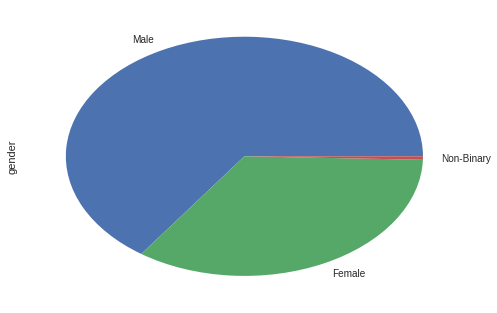

In [10]:
users['gender'].value_counts().plot.pie()

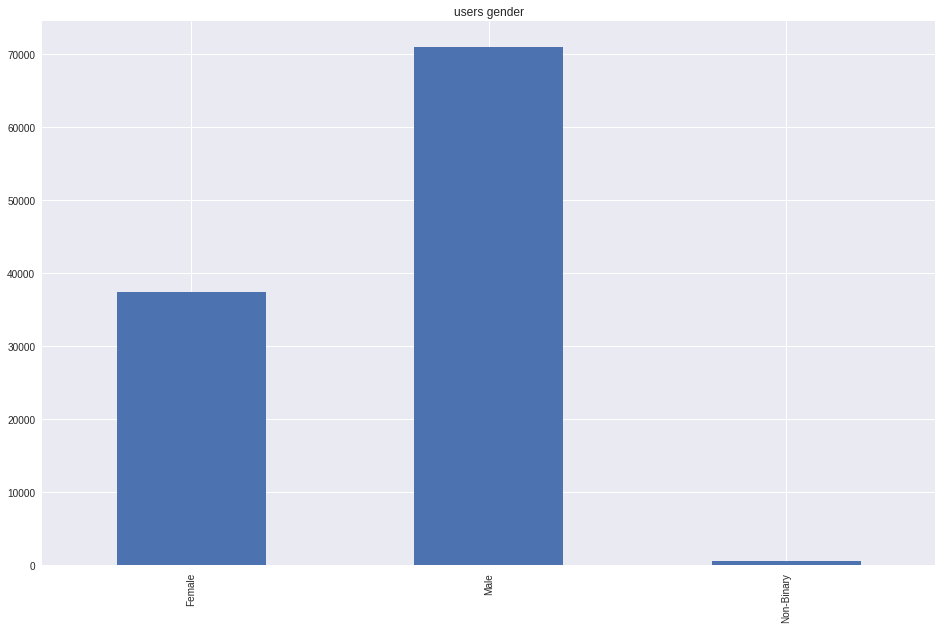

In [11]:
users['gender'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='users gender')

In [12]:
users['age'] = 2018 - users['birth_date'].dt.year

In [13]:
print(users['age'].min())
print(users['age'].max())


10
49


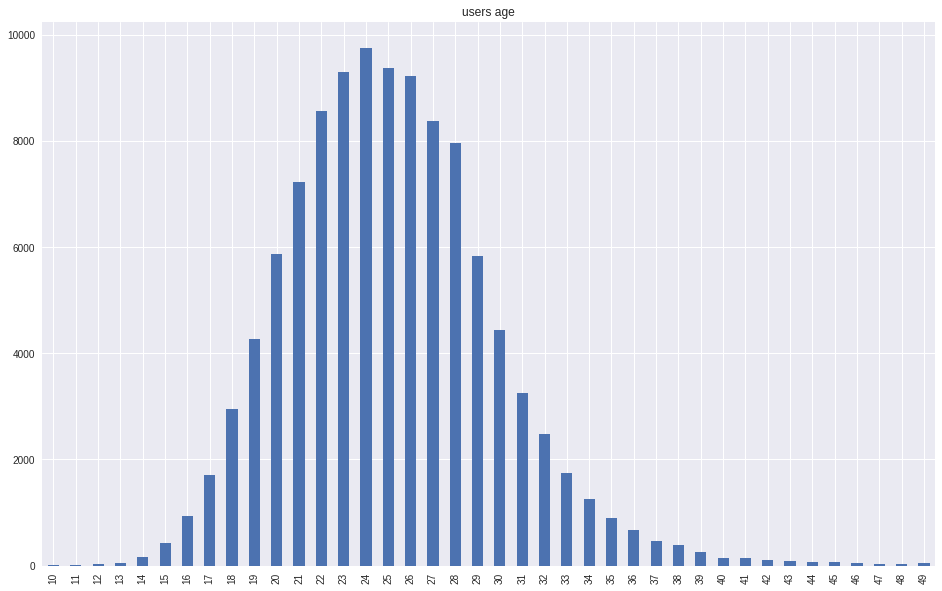

In [14]:
users['age'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='users age')

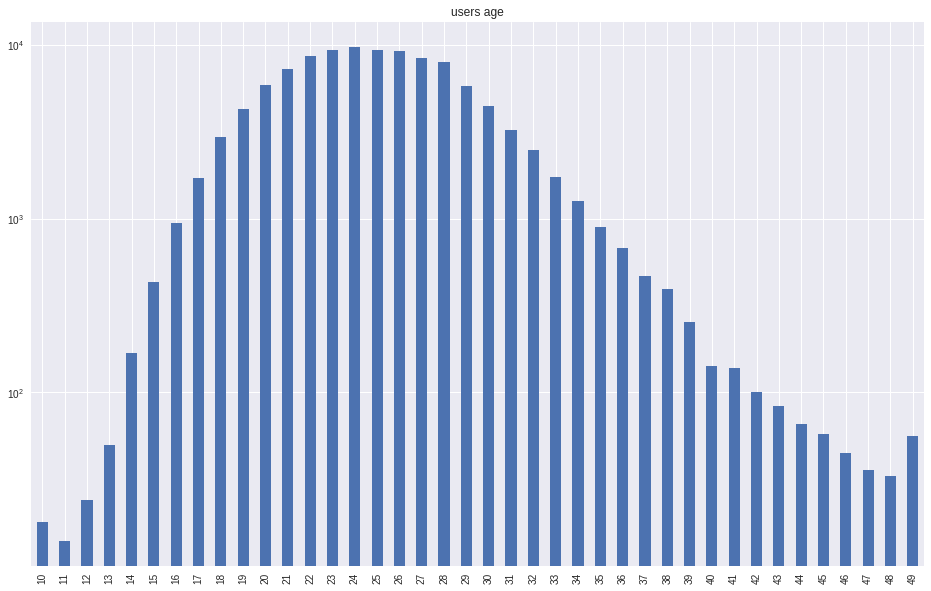

In [15]:
users['age'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='users age', logy=True)

In [16]:
users['age'].describe()

count    108711.000000
mean         25.125820
std           4.632399
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          49.000000
Name: age, dtype: float64

In [17]:
((users['age'] > 45) | (users['age'] < 10)).sum() / users['age'].count()

0.0015637791943777539

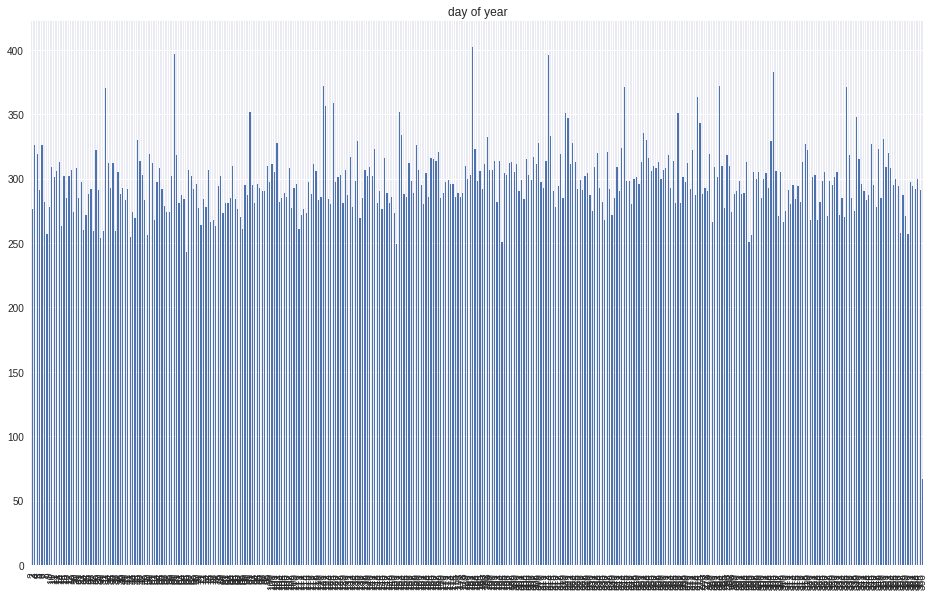

In [18]:
users['birth_date'].dt.dayofyear.value_counts().sort_index().plot.bar(figsize=(16, 10), title='day of year')

In [19]:
display(users[users['birth_date'].dt.dayofyear == 1]['age'].describe())
display(users['age'].describe())


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64

count    108711.000000
mean         25.125820
std           4.632399
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          49.000000
Name: age, dtype: float64

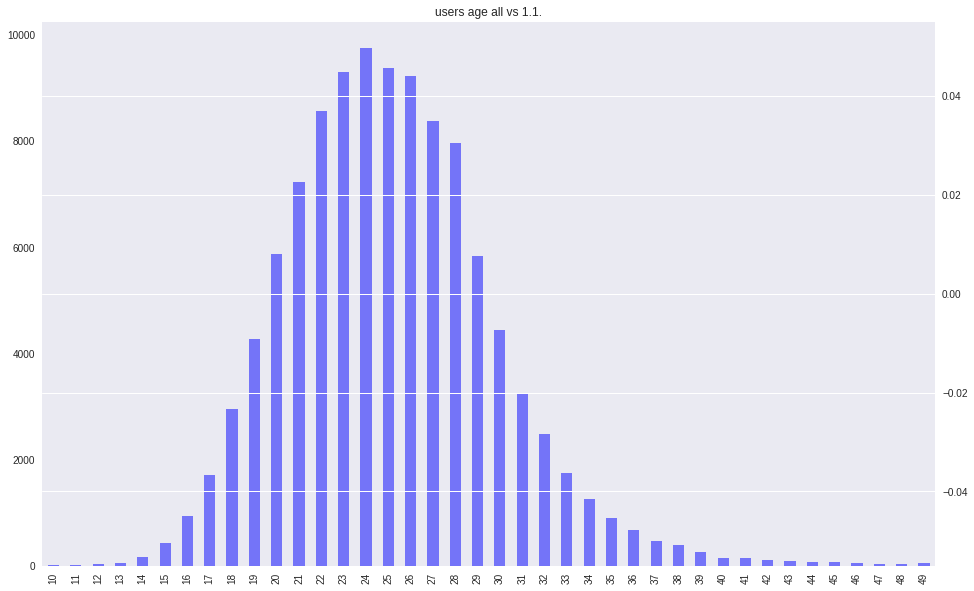

In [20]:
total_count = users['age'].count()
first_jan_count = users[users['birth_date'].dt.dayofyear == 1]['age'].count()
plt.figure(figsize=(16, 10))
ax = plt.gca()

users_in_first_jan = users[users['birth_date'].dt.dayofyear == 1]['age'].value_counts()
users_in_first_jan = users_in_first_jan.reindex(users['age'].value_counts().index)
users['age'].value_counts().sort_index().plot.bar(ax=ax, title='users age all vs 1.1.', color='blue', alpha=0.5)
users_in_first_jan.sort_index().plot.bar(ax=ax, color='red', alpha=0.5, secondary_y=True)
#ax.set_xlim(users['age'].min(), users['age'].max())
#plt.xticks(users['age'].value_counts().index)
plt.show()

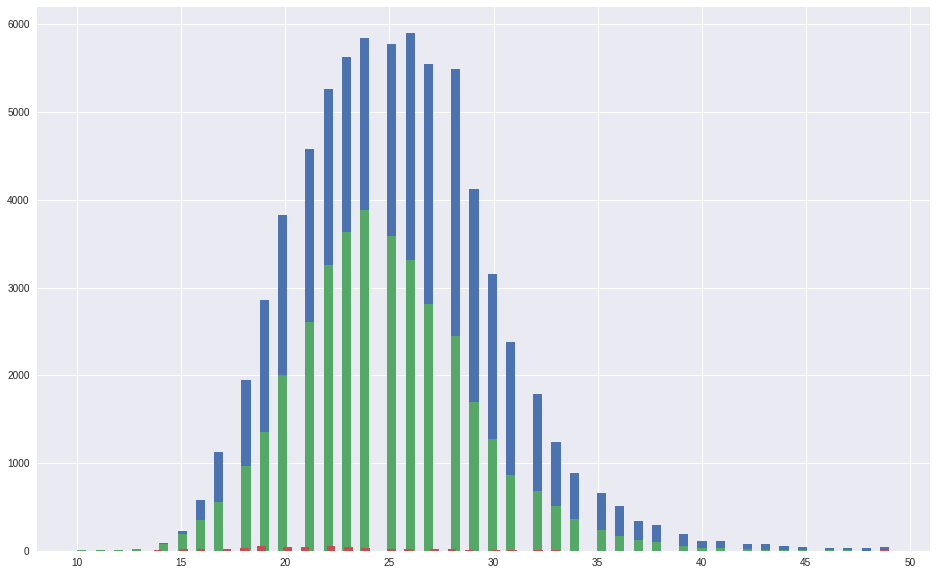

In [21]:
users[users['gender'] == 'Male']['age'].hist(bins=89, figsize=(16,10))
users[users['gender'] == 'Female']['age'].hist(bins=89, figsize=(16,10))
users[users['gender'] == 'Non-Binary']['age'].hist(bins=89, figsize=(16,10))


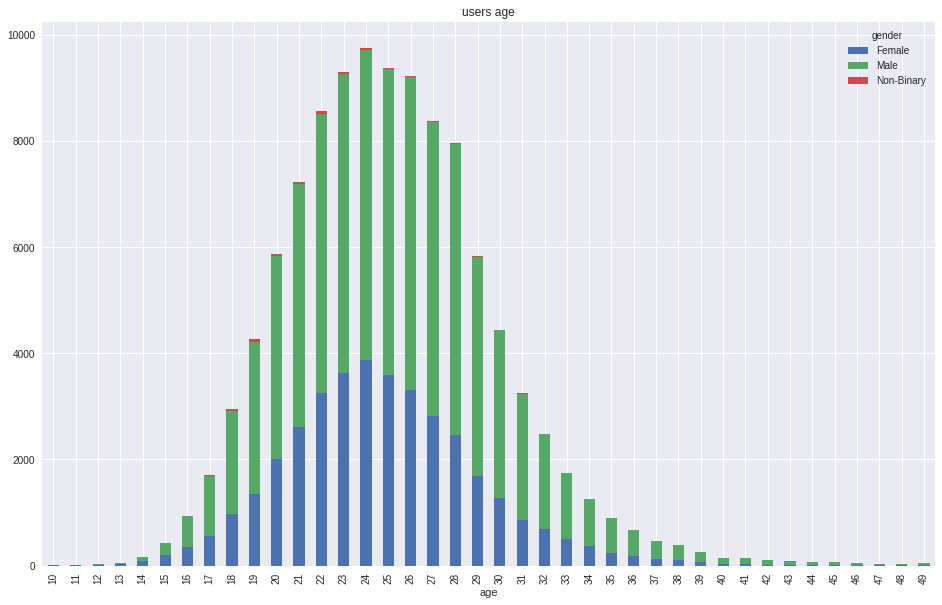

In [22]:
user_gender_age = pd.crosstab(users['age'], users['gender'])
user_gender_age.plot.bar(stacked=True, figsize=(16, 10), title='users age')


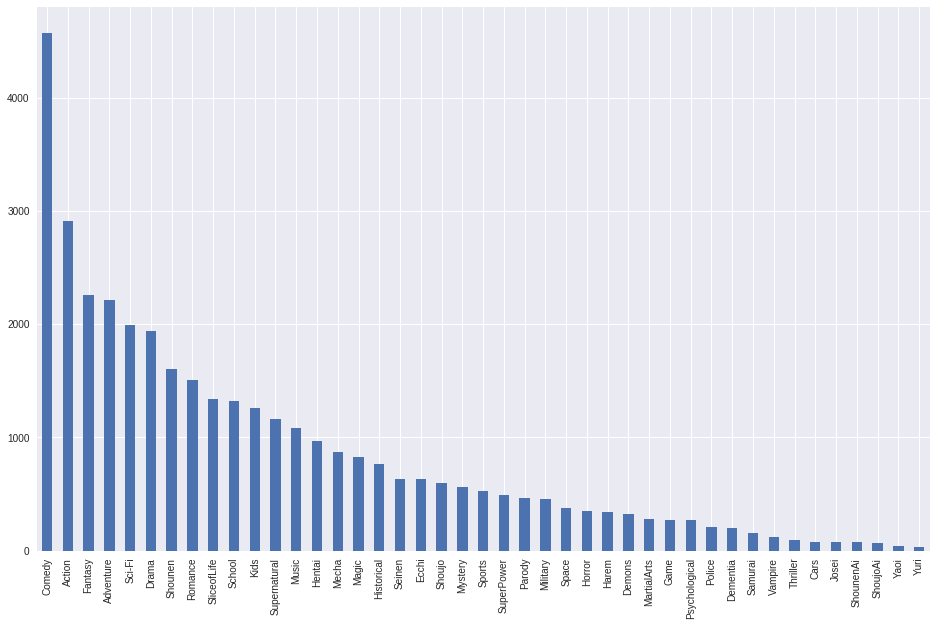

In [23]:
animes['genres'].fillna('', inplace=True)
genres = animes['genres'].apply(lambda x: x.replace(' ', '').split(','))
genres = pd.Series([y for x in genres for y in x if y != '']).value_counts()
genres.plot(kind='bar', figsize=(16, 10))

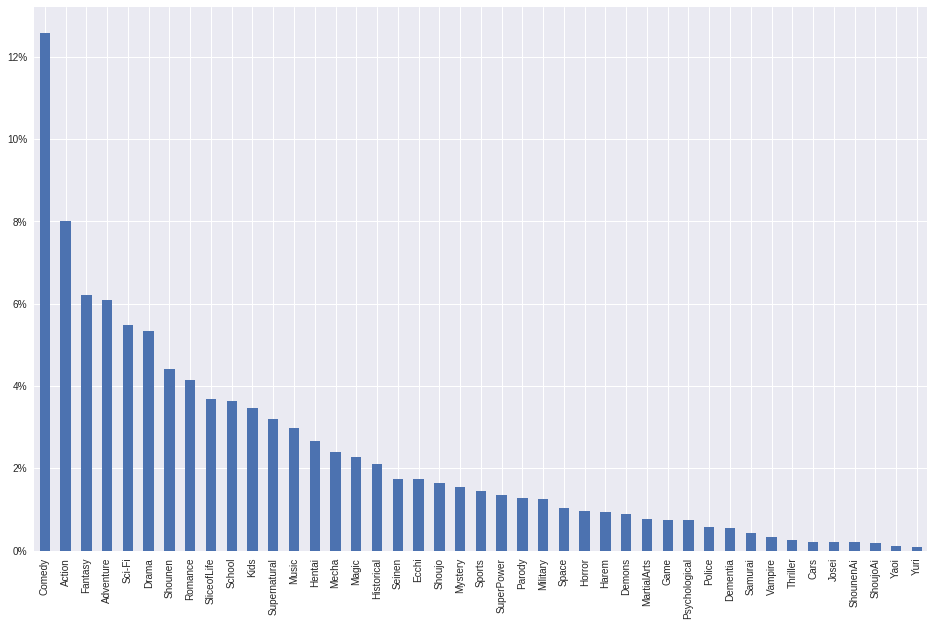

In [24]:
(genres / genres.sum()).plot(kind='bar', figsize=(16, 10))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [25]:
genres / genres.sum()

Comedy           0.125808
Action           0.080085
Fantasy          0.062092
Adventure        0.060965
Sci-Fi           0.054830
Drama            0.053454
Shounen          0.044265
Romance          0.041514
SliceofLife      0.036755
School           0.036287
Kids             0.034554
Supernatural     0.031940
Music            0.029905
Hentai           0.026548
Mecha            0.024017
Magic            0.022834
Historical       0.021073
Seinen           0.017525
Ecchi            0.017497
Shoujo           0.016479
Mystery          0.015516
Sports           0.014443
SuperPower       0.013645
Parody           0.012820
Military         0.012518
Space            0.010482
Horror           0.009656
Harem            0.009299
Demons           0.008969
MartialArts      0.007676
Game             0.007428
Psychological    0.007345
Police           0.005695
Dementia         0.005585
Samurai          0.004292
Vampire          0.003356
Thriller         0.002614
Cars             0.002228
Josei       

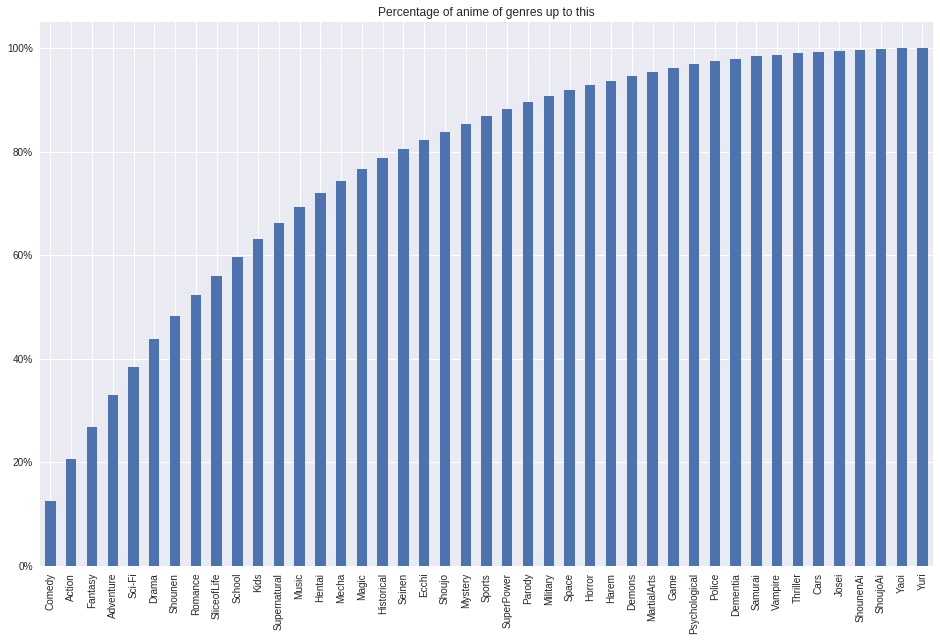

In [26]:
(genres / genres.sum()).cumsum().plot(kind='bar', figsize=(16, 10), title='Percentage of anime of genres up to this')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [27]:
(genres / genres.sum()).cumsum()

Comedy           0.125808
Action           0.205893
Fantasy          0.267985
Adventure        0.328950
Sci-Fi           0.383779
Drama            0.437233
Shounen          0.481499
Romance          0.523013
SliceofLife      0.559768
School           0.596055
Kids             0.630609
Supernatural     0.662549
Music            0.692454
Hentai           0.719002
Mecha            0.743019
Magic            0.765853
Historical       0.786927
Seinen           0.804451
Ecchi            0.821948
Shoujo           0.838427
Mystery          0.853944
Sports           0.868387
SuperPower       0.882033
Parody           0.894853
Military         0.907370
Space            0.917852
Horror           0.927508
Harem            0.936807
Demons           0.945776
MartialArts      0.953451
Game             0.960879
Psychological    0.968225
Police           0.973920
Dementia         0.979504
Samurai          0.983796
Vampire          0.987152
Thriller         0.989766
Cars             0.991994
Josei       

In [28]:
print('total percentage of some genres: ', (genres[['Yuri', 'Yaoi', 'ShounenAi', 'ShoujoAi']] / genres.sum()).sum())

total percentage of some genres:  0.005859858593083717


In [29]:
# now calculating for anime if they contain genre, so numbers will be higher and they won't sum to 1
animes_genres = animes['genres'].apply(lambda x: x.replace(' ', ''))
# can not use reverse isin, must use str.contains
genres_occurence = pd.Series({genre: (animes_genres.str.contains(genre)).sum() for genre in genres.index})
#animes_genres.str.contains('Yuri')

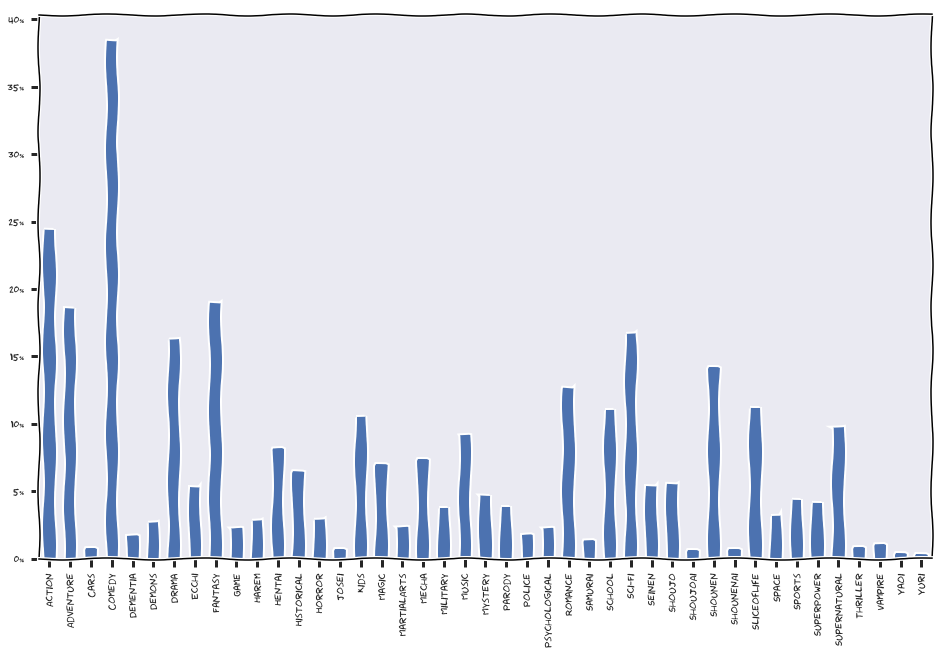

In [148]:
(genres_occurence / animes.shape[0]).plot(kind='bar', figsize=(16, 10))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

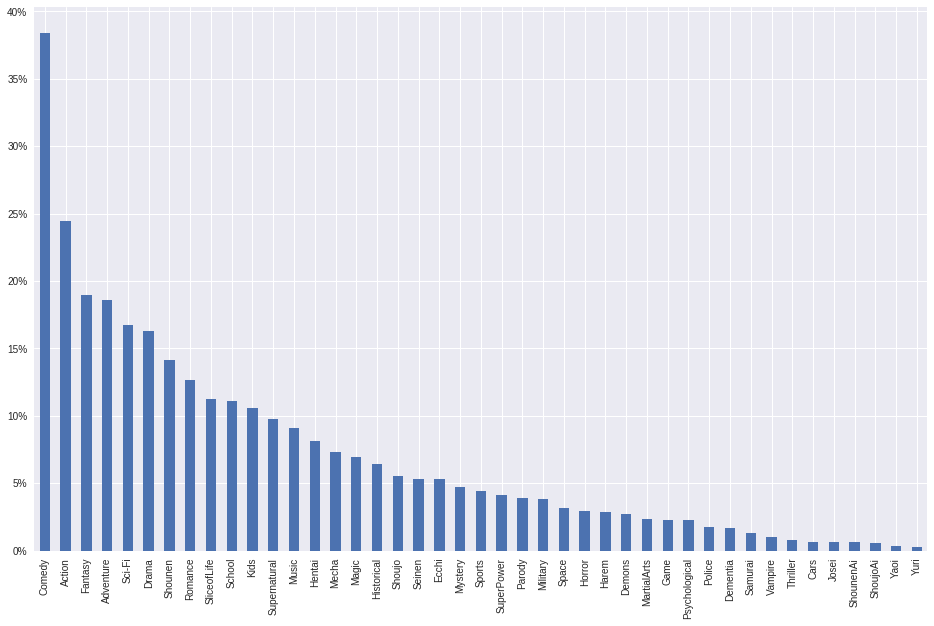

In [157]:
(genres_occurence / animes.shape[0]).sort_values(ascending=False).plot(kind='bar', figsize=(16, 10))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [31]:
print('total percentage of some genres: ', (genres_occurence[['Yuri', 'Yaoi', 'ShounenAi', 'ShoujoAi']] / animes.shape[0]).sum())
print('total percentage of some genres: ', (genres_occurence[['Yuri', 'Yaoi']] / animes.shape[0]).sum())

total percentage of some genres:  0.017887134699361772
total percentage of some genres:  0.005878401074907625


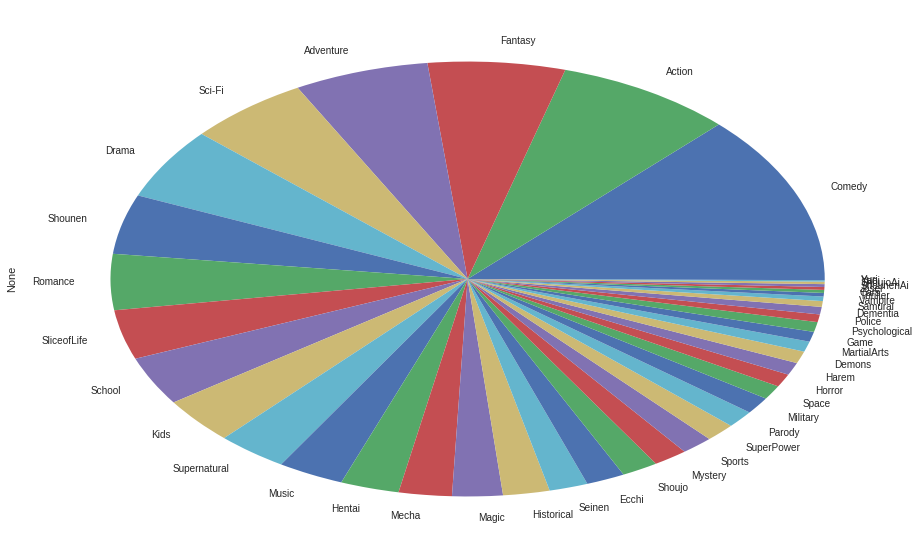

In [32]:
genres.plot.pie(figsize=(16, 10))

In [33]:
genres_years = pd.crosstab(animes['aired_from'].dt.year, animes['genres'])

In [34]:
display(animes['aired_from'].dt.year.describe())
years_diff = int(animes['aired_from'].dt.year.max() - animes['aired_from'].dt.year.min()) + 1
display(years_diff)
anime_aired_year = animes['aired_from'].dt.year.dropna().astype(np.int)

count    10859.000000
mean      2005.583571
std         12.875457
min       1917.000000
25%       2001.000000
50%       2010.000000
75%       2015.000000
max       2018.000000
Name: aired_from, dtype: float64

102

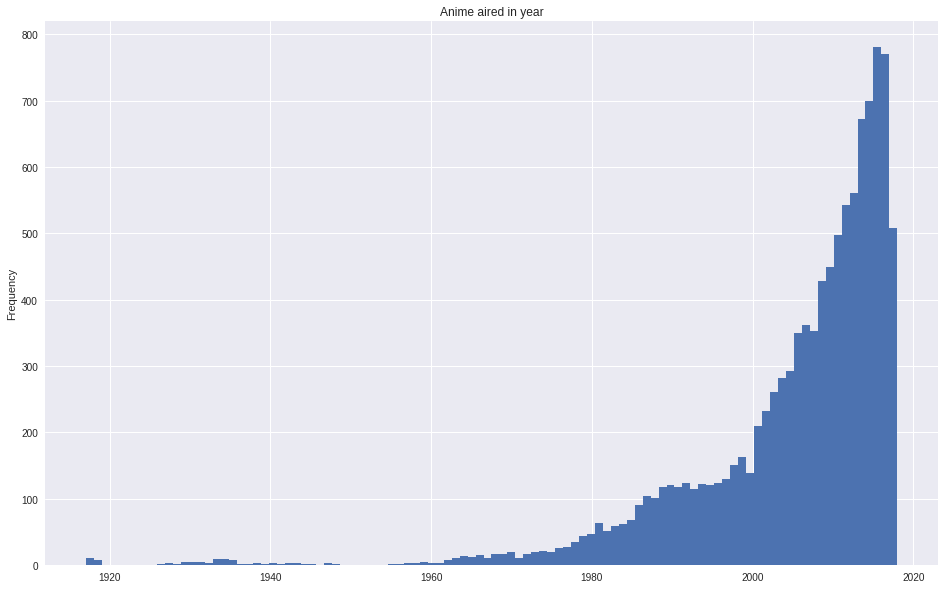

In [35]:
anime_aired_year.plot(kind='hist', bins=years_diff, figsize=(16, 10), title='Anime aired in year')

(2000, 2018)

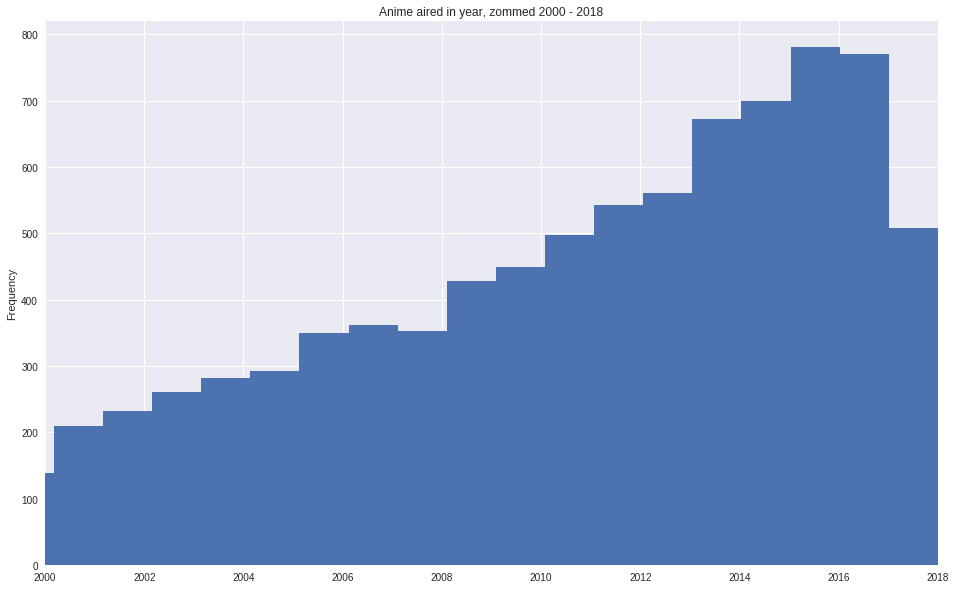

In [36]:
anime_aired_year.plot(kind='hist', bins=years_diff, figsize=(16, 10), title='Anime aired in year, zommed 2000 - 2018')
plt.gca().set_xlim([2000, 2018])

In [37]:
animes[animes['title'] == 'Usavich']['aired']

anime_id
3737    {'from': '2018-05-12', 'to': '2018-05-12'}
Name: aired, dtype: object

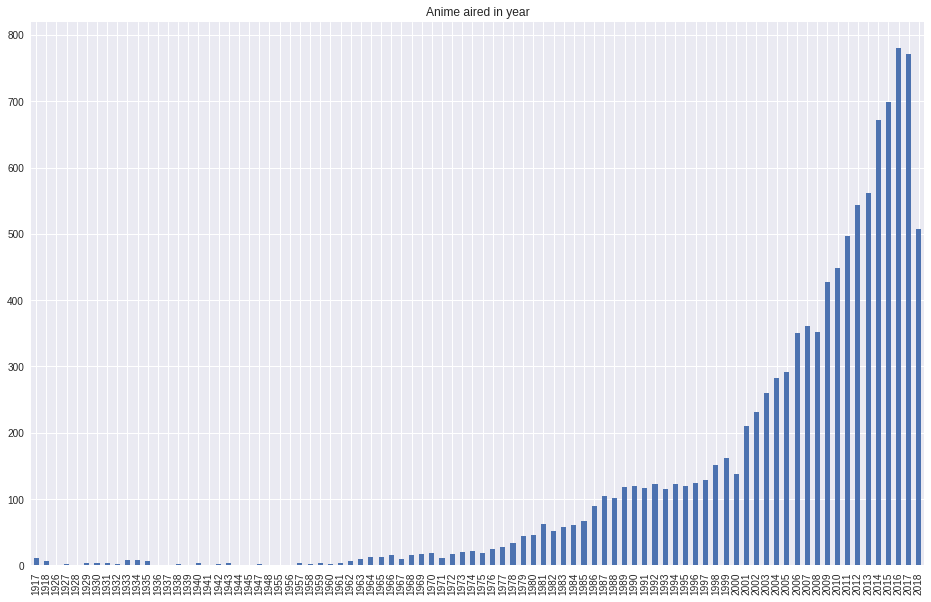

In [38]:
anime_aired_year.value_counts().sort_index().plot.bar(figsize=(16, 10), title='Anime aired in year')

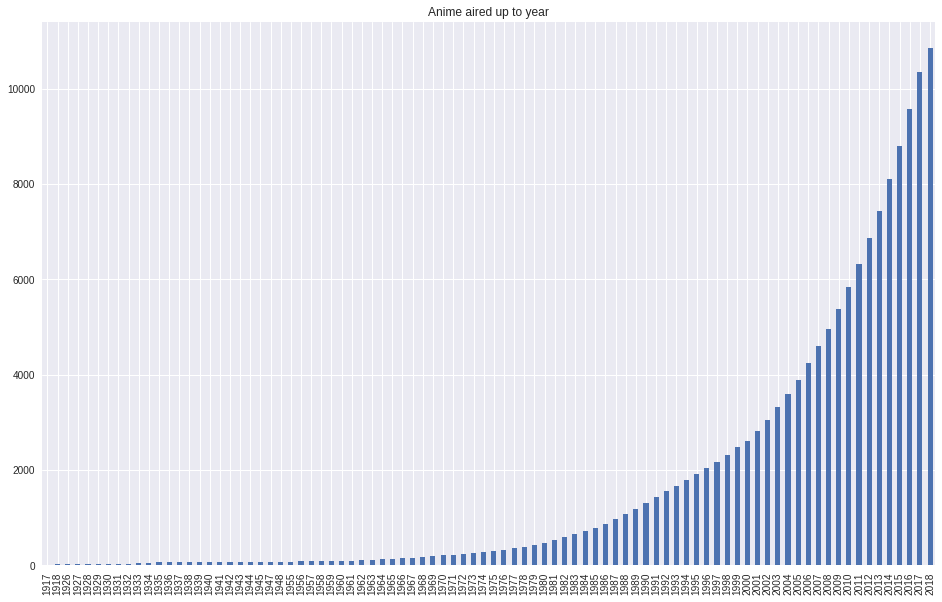

In [39]:
anime_aired_year.value_counts().sort_index().cumsum().plot.bar(figsize=(16, 10), title='Anime aired up to year')

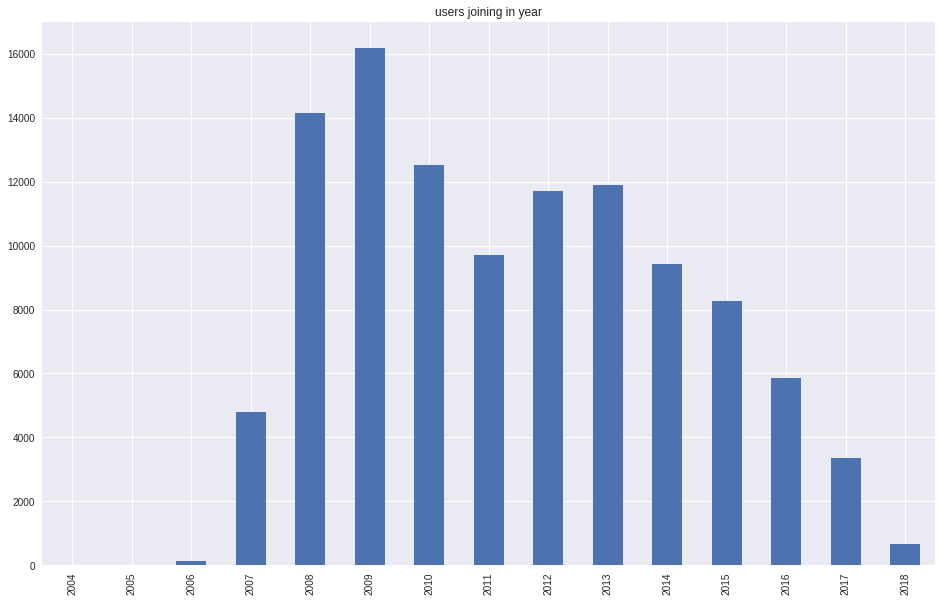

In [40]:
users['join_date'].dt.year.value_counts().sort_index().plot.bar(figsize=(16, 10), title='users joining in year')

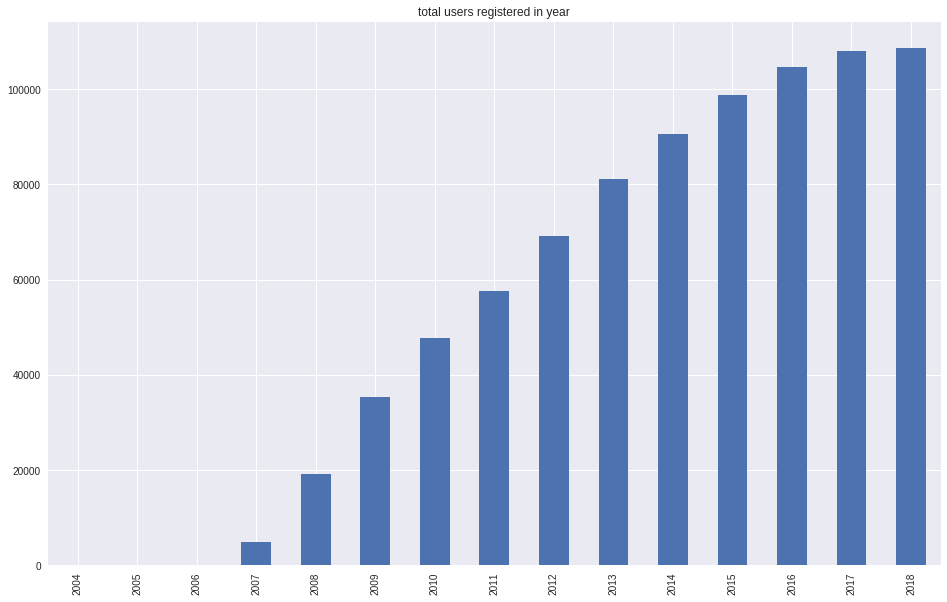

In [41]:
users['join_date'].dt.year.value_counts().sort_index().cumsum().plot.bar(figsize=(16, 10), title='total users registered in year')

In [42]:
# counting 0 score, which is not rated, drastically moves both mean and variance
users['rating_mean'] = animelists[animelists['my_score'] != 0].groupby('username')['my_score'].mean()
users['rating_var'] = animelists[animelists['my_score'] != 0].groupby('username')['my_score'].var()

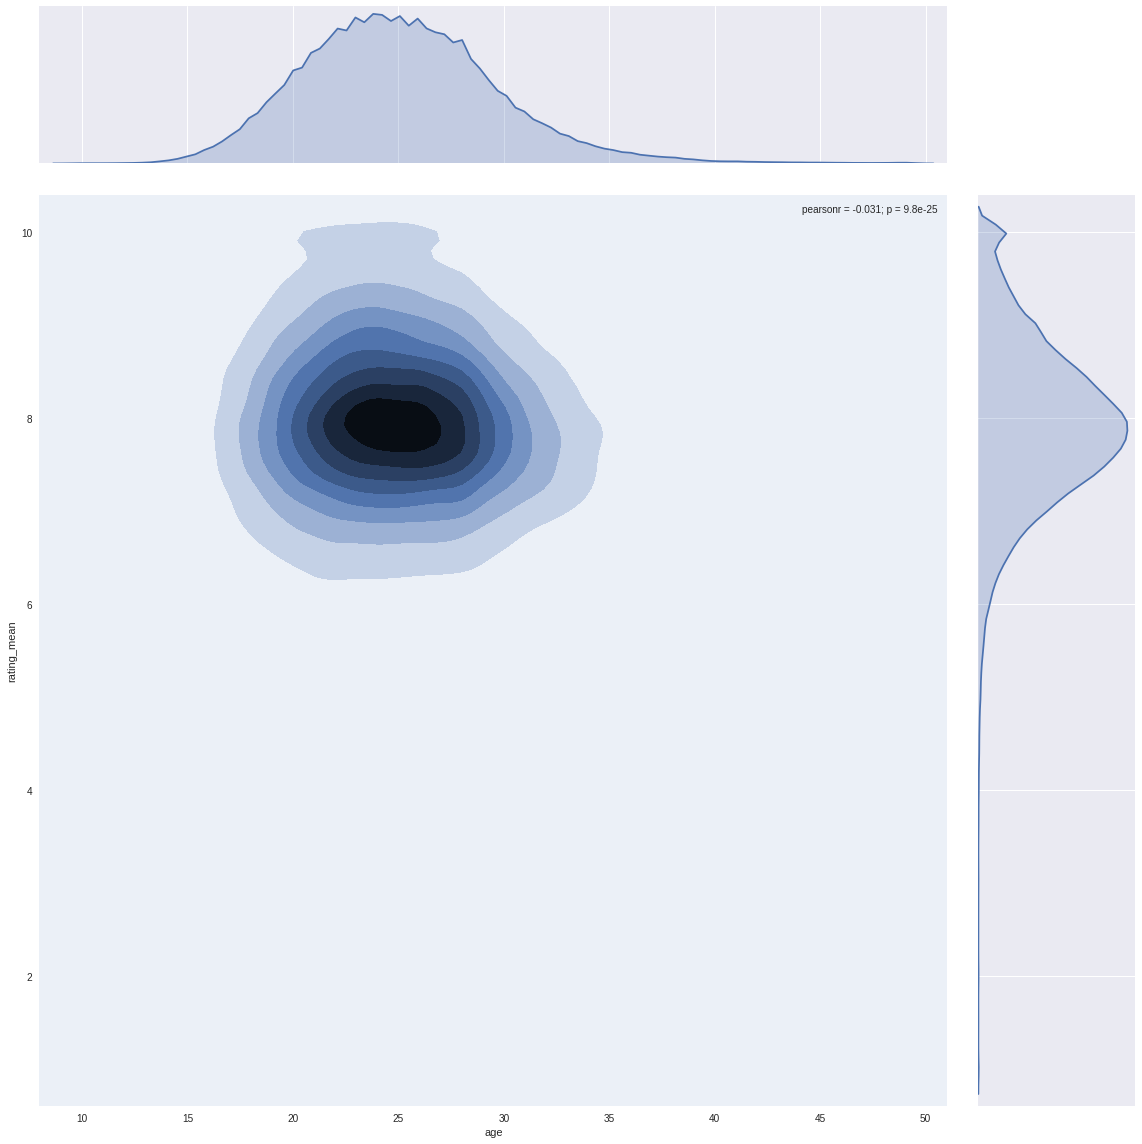

In [43]:
sns.jointplot(x='age', y='rating_mean', data=users, size=16, kind='kde')

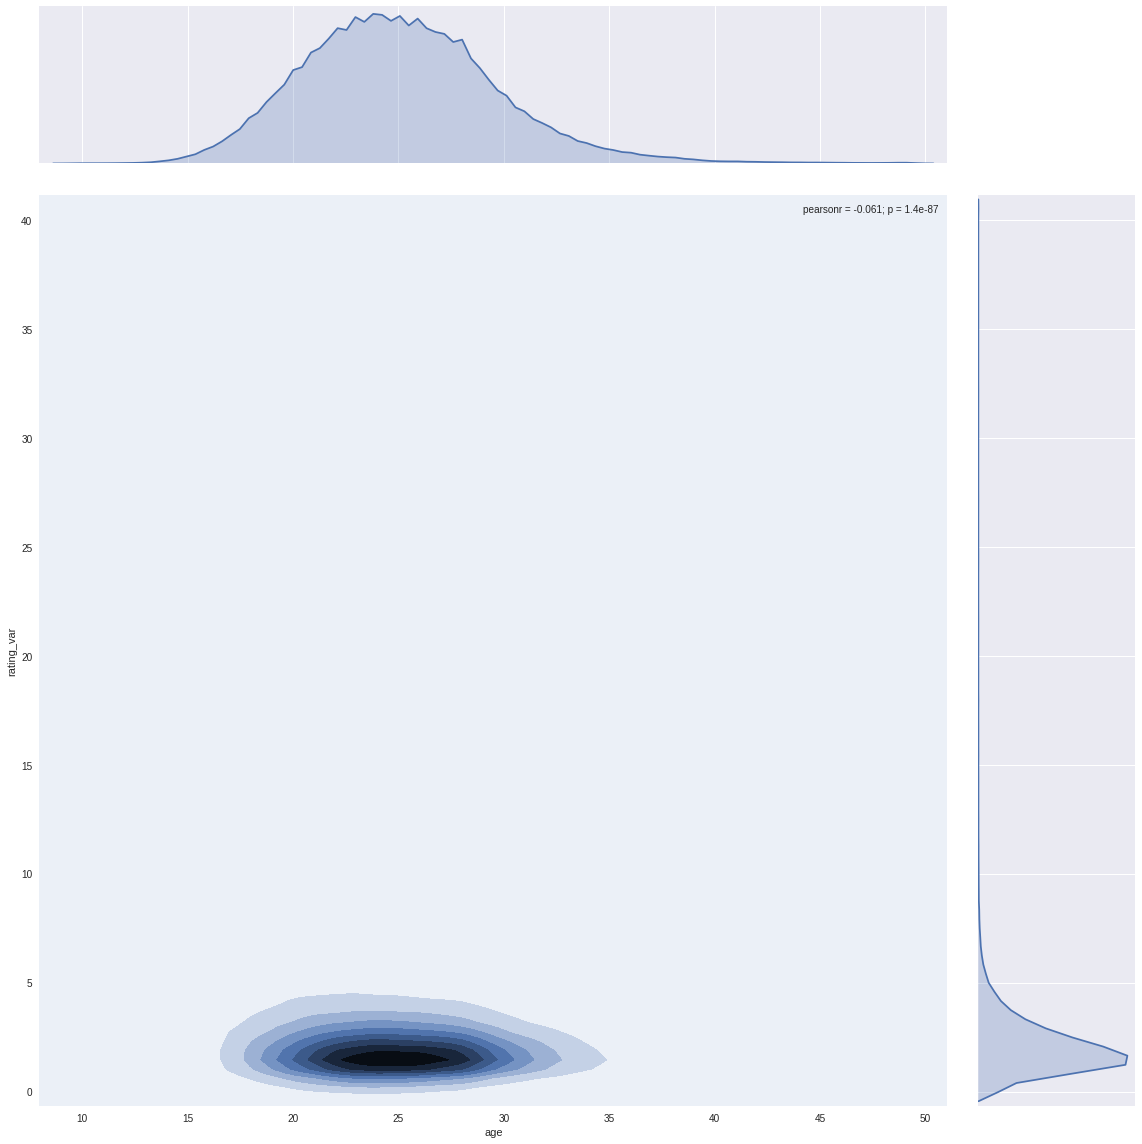

In [44]:
sns.jointplot(x='age', y='rating_var', data=users, size=16, kind='kde')

In [45]:
users['seen_anime'] = animelists.groupby('username')['anime_id'].count()

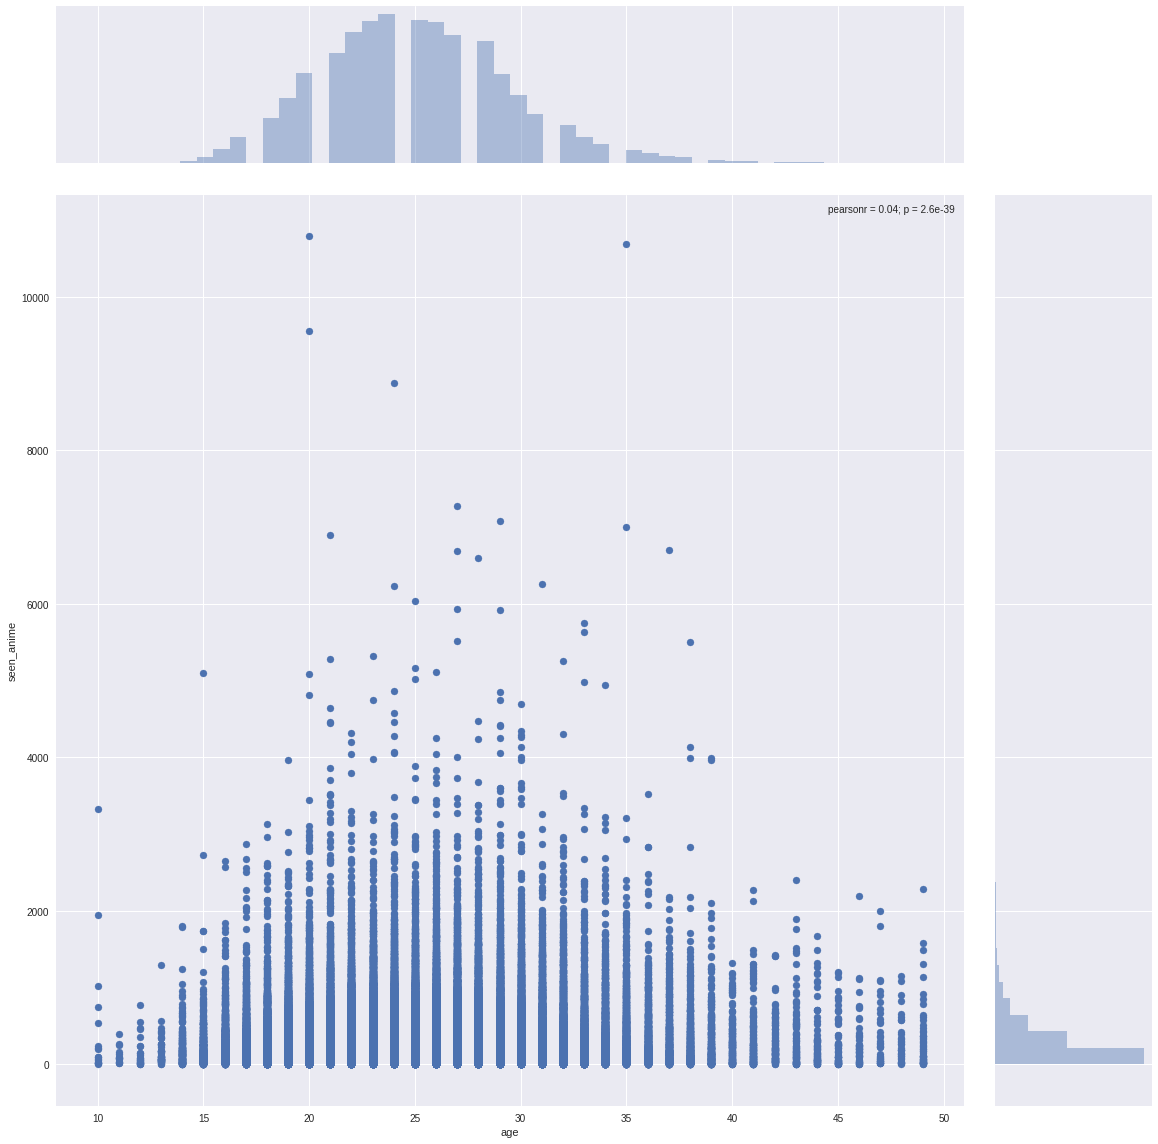

In [46]:
sns.jointplot(x='age', y='seen_anime', data=users, size=16)

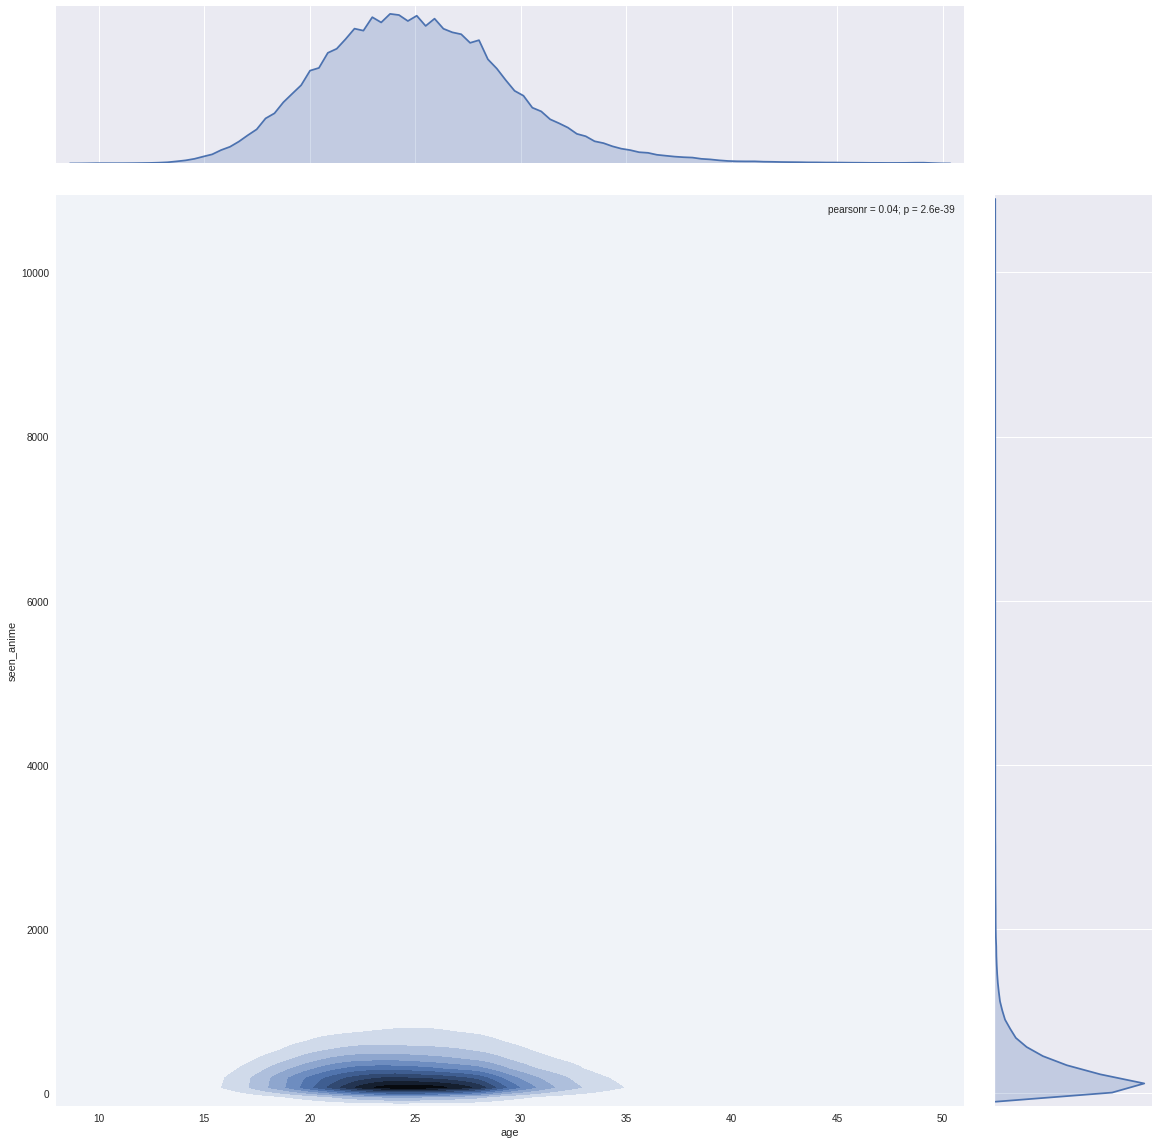

In [47]:
sns.jointplot(x='age', y='seen_anime', data=users, size=16, kind='kde')

In [48]:
users['days_on_mal'] = (users['last_online'] - users['join_date']) / np.timedelta64(1, 'D')

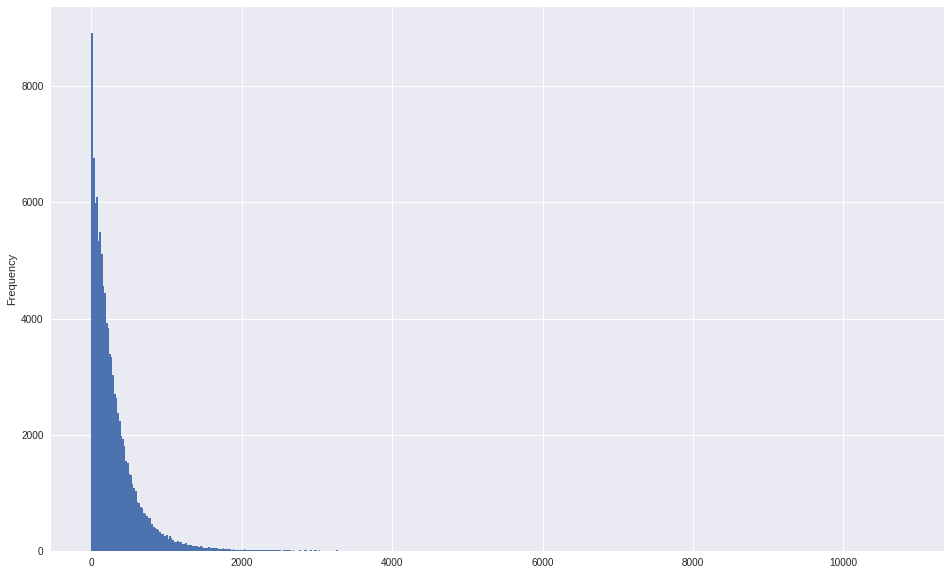

In [49]:
users['seen_anime'].plot(kind='hist', bins=500, figsize=(16, 10))

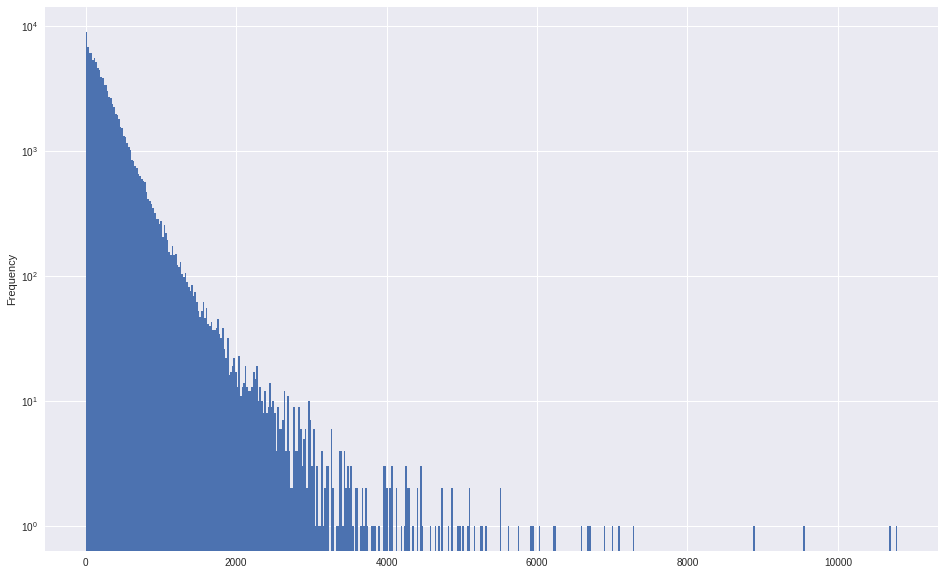

In [50]:
users['seen_anime'].plot(kind='hist', bins=500, figsize=(16, 10), logy=True)

In [51]:
users[users['days_on_mal'] > 4500][['user_id', 'join_date', 'last_online', 'days_on_mal']]

,user_id,join_date,last_online,days_on_mal
username,,,,
Xinil,1,2004-11-05,2018-05-14 18:02:55,4938.752025
Achtor,82,2005-04-29,2018-05-13 11:11:00,4762.465972
vondur,20,2005-01-05,2018-02-28 17:27:29,4802.727419
Crystal,4,2004-11-13,2018-05-14 13:04:48,4930.545000
Baman,36,2005-02-05,2018-05-20 04:57:26,4852.206551
Arinohyoshi,208,2005-01-30,2017-10-09 18:32:43,4635.772720


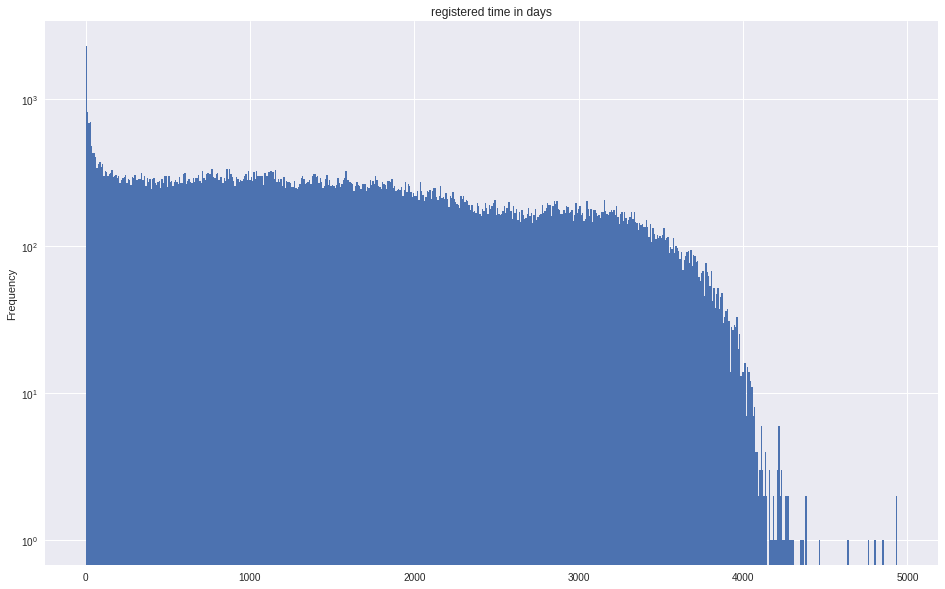

In [52]:
users['days_on_mal'].plot(kind='hist', logy=True, bins=600, figsize=(16, 10), title='registered time in days')

In [53]:
users[users['seen_anime'] > 5000]['seen_anime'].value_counts()

6698     1
5936     1
7079     1
10694    1
5255     1
6685     1
5514     1
6603     1
5324     1
5921     1
6996     1
6231     1
6042     1
6256     1
5089     1
10790    1
5287     1
9559     1
5099     1
7280     1
5168     1
6897     1
8884     1
5749     1
5114     1
5628     1
5018     1
5504     1
Name: seen_anime, dtype: int64

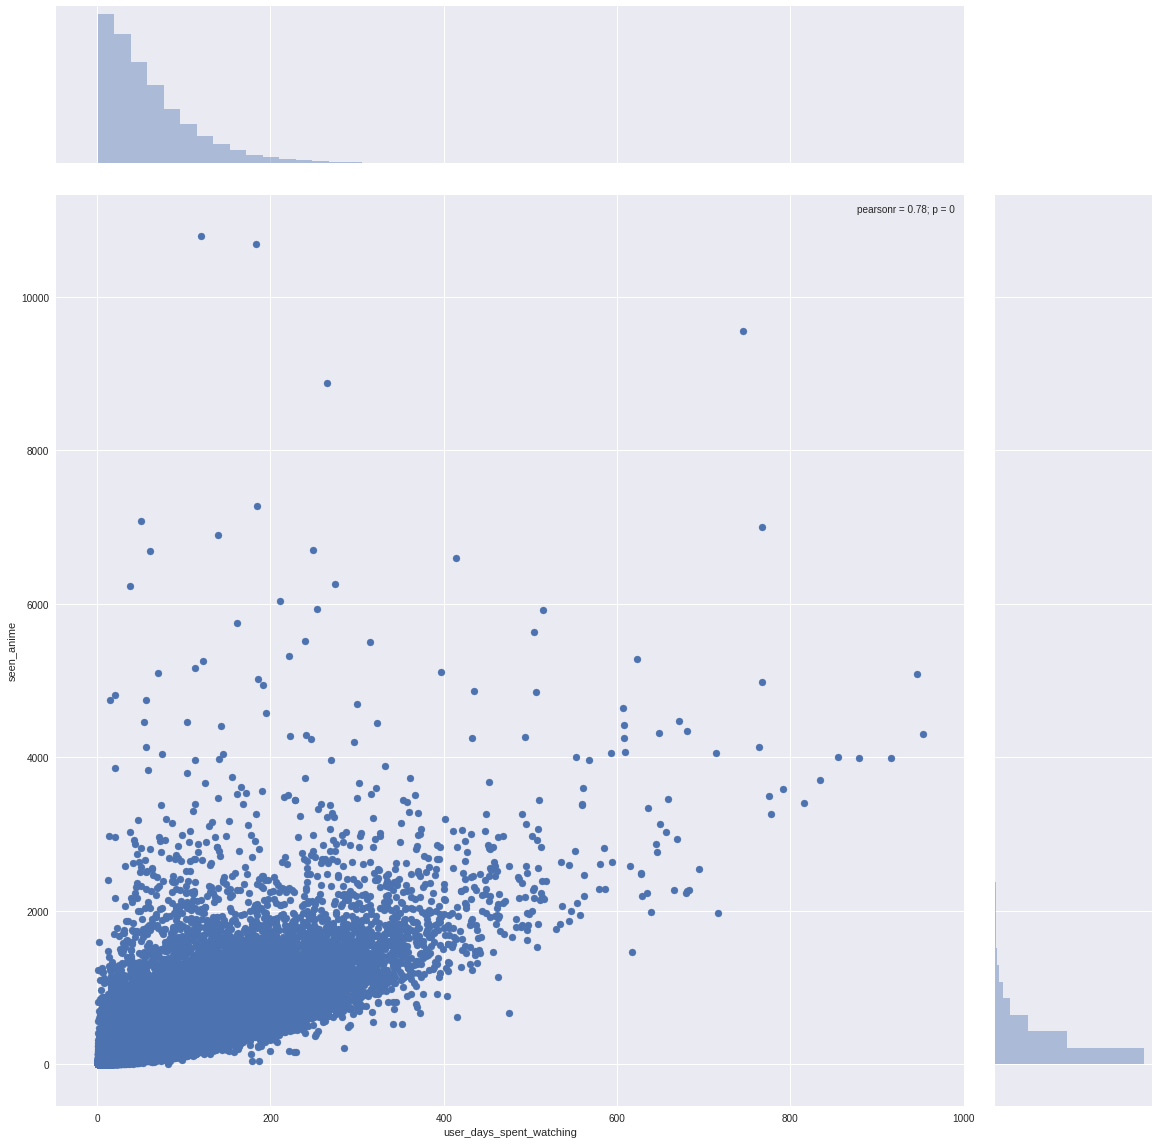

In [54]:
sns.jointplot(x='user_days_spent_watching', y='seen_anime', data=users, size=16)

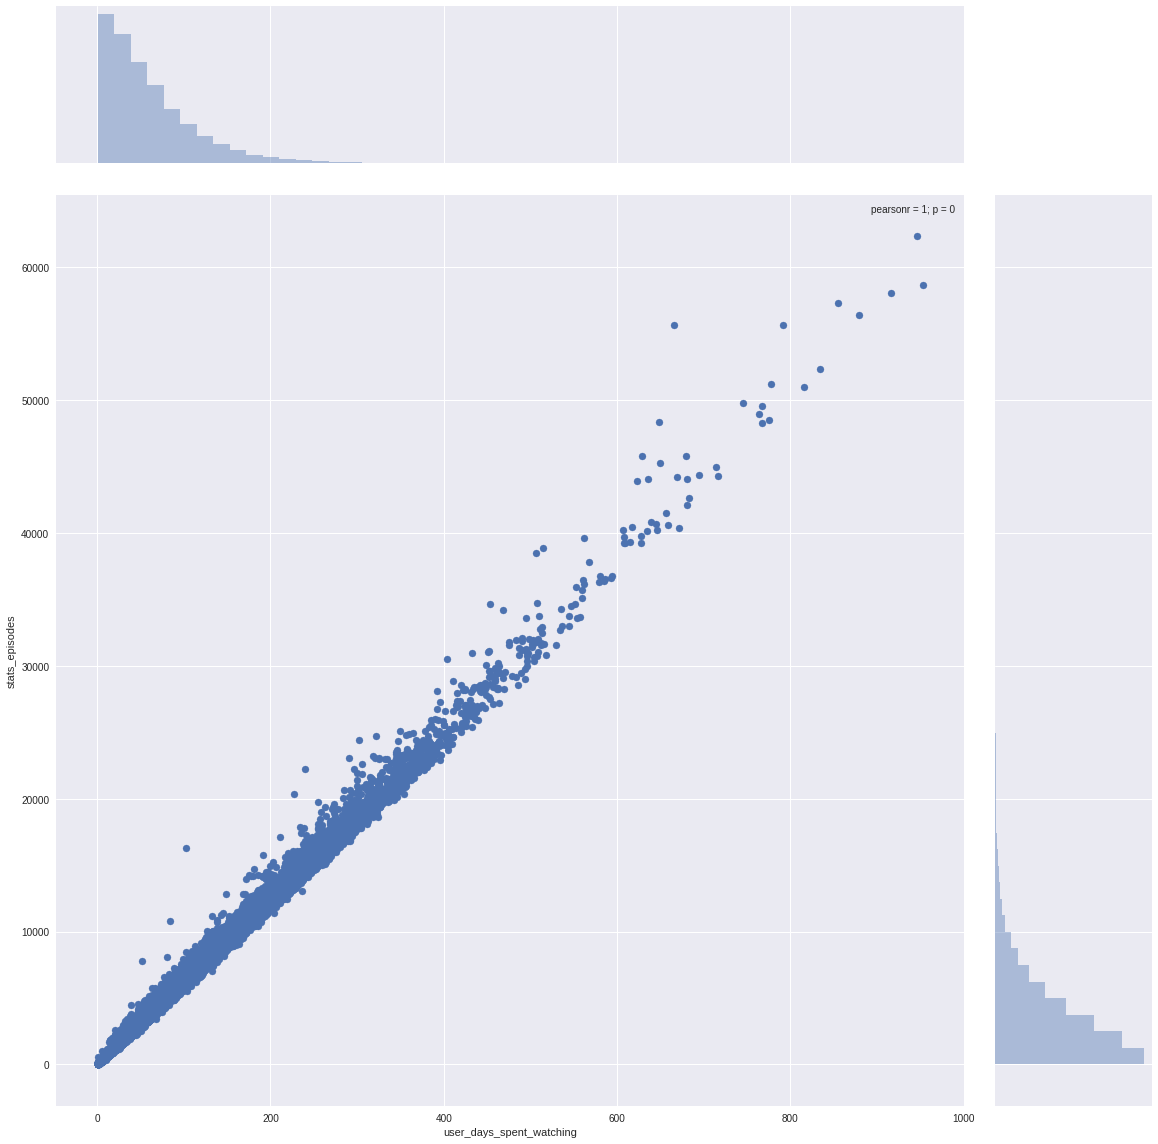

In [55]:
sns.jointplot(x='user_days_spent_watching', y='stats_episodes', data=users, size=16)

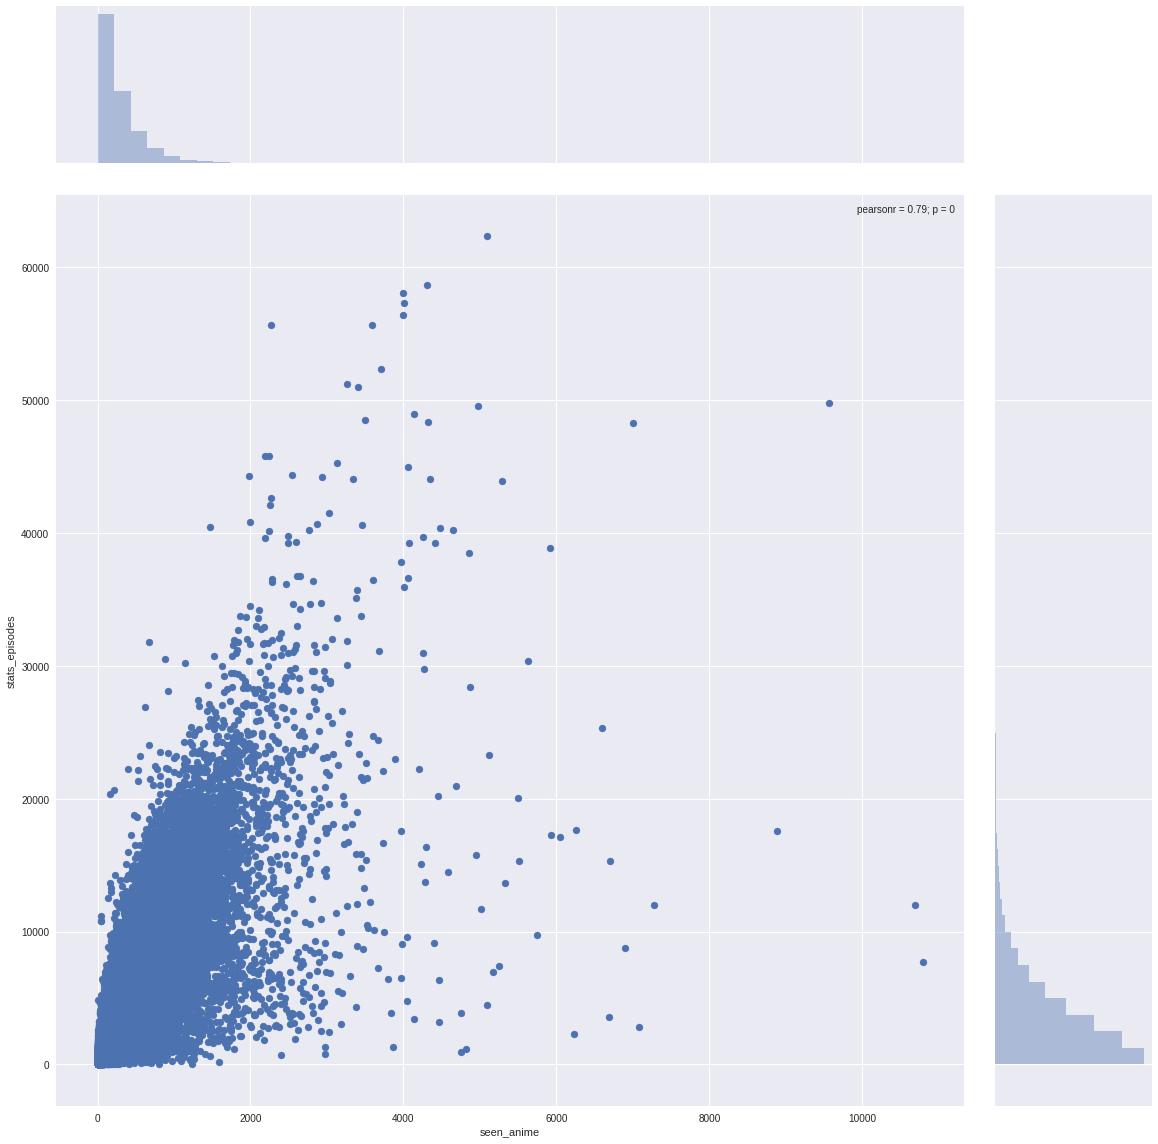

In [56]:
sns.jointplot(x='seen_anime', y='stats_episodes', data=users, size=16)

In [57]:
users.columns

Index(['user_id', 'user_watching', 'user_completed', 'user_onhold',
       'user_dropped', 'user_plantowatch', 'user_days_spent_watching',
       'gender', 'location', 'birth_date', 'access_rank', 'join_date',
       'last_online', 'stats_mean_score', 'stats_rewatched', 'stats_episodes',
       'age', 'rating_mean', 'rating_var', 'seen_anime', 'days_on_mal'],
      dtype='object')

In [58]:
users['rating_mean'].isnull().sum()

2298

In [59]:
users['rating_mean'].fillna(0, inplace=True)
users['rating_var'].fillna(0, inplace=True)

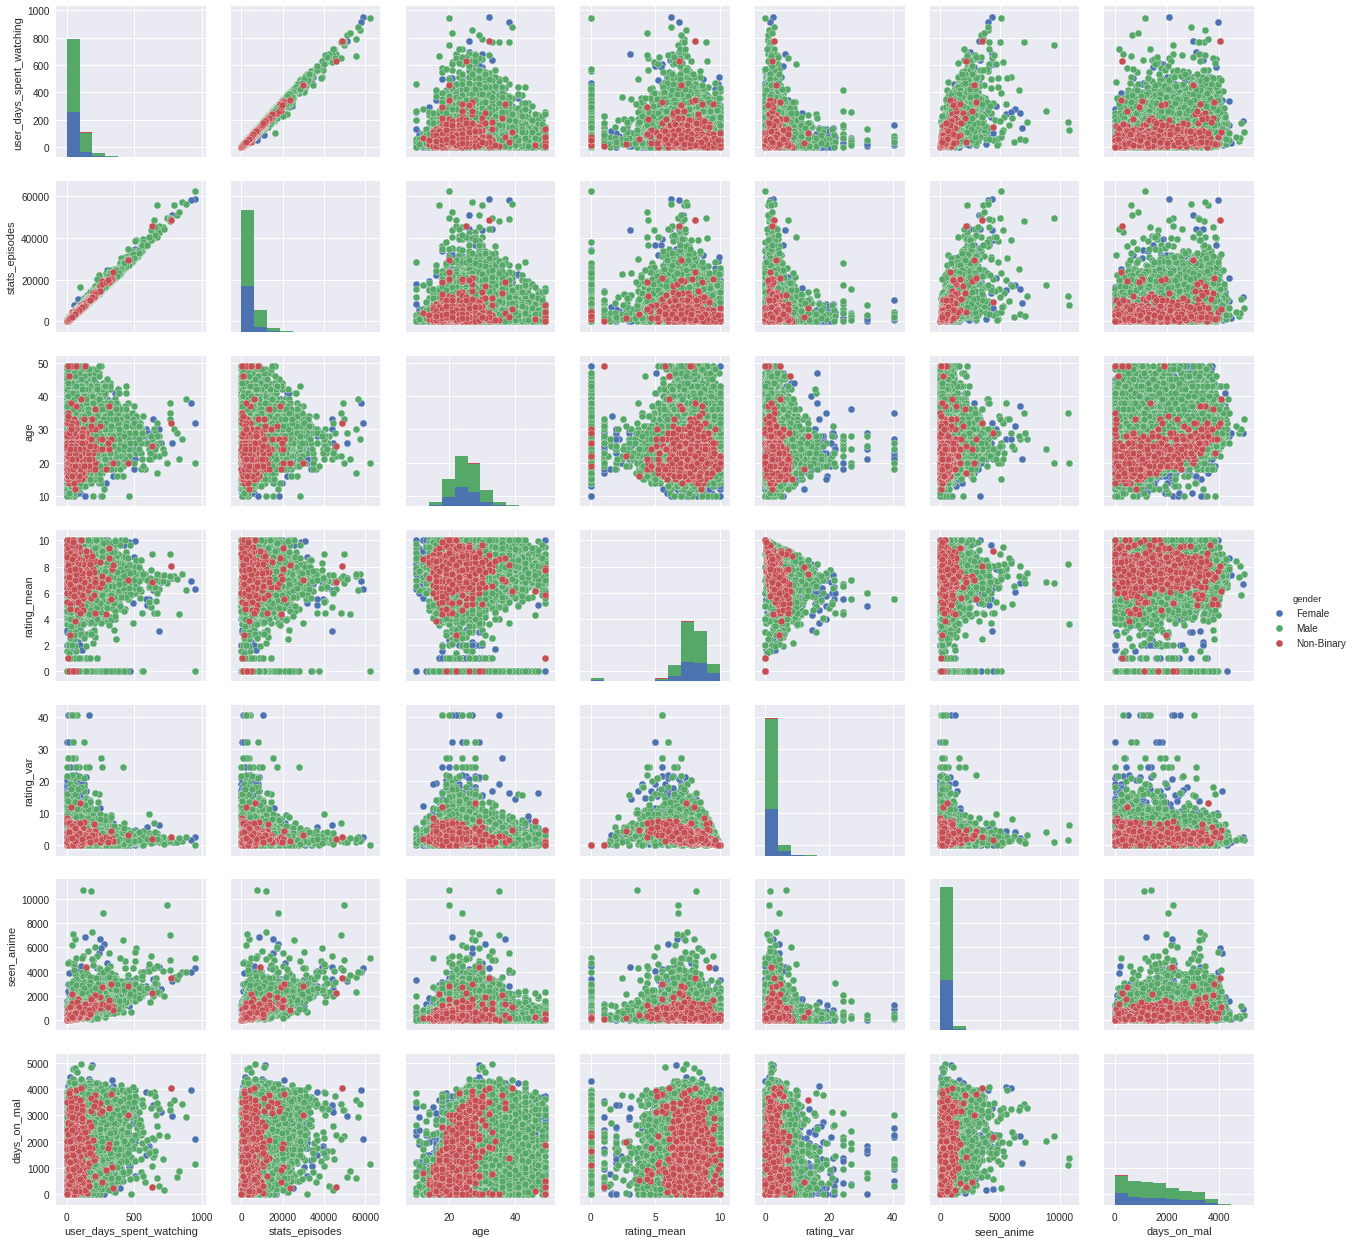

In [60]:
sns.pairplot(users[['user_days_spent_watching',
       'gender', 'birth_date', 'join_date',
       'last_online', 'stats_episodes',
       'age', 'rating_mean', 'rating_var', 'seen_anime',
       'days_on_mal']], hue='gender')

### inspecting anime age ratings

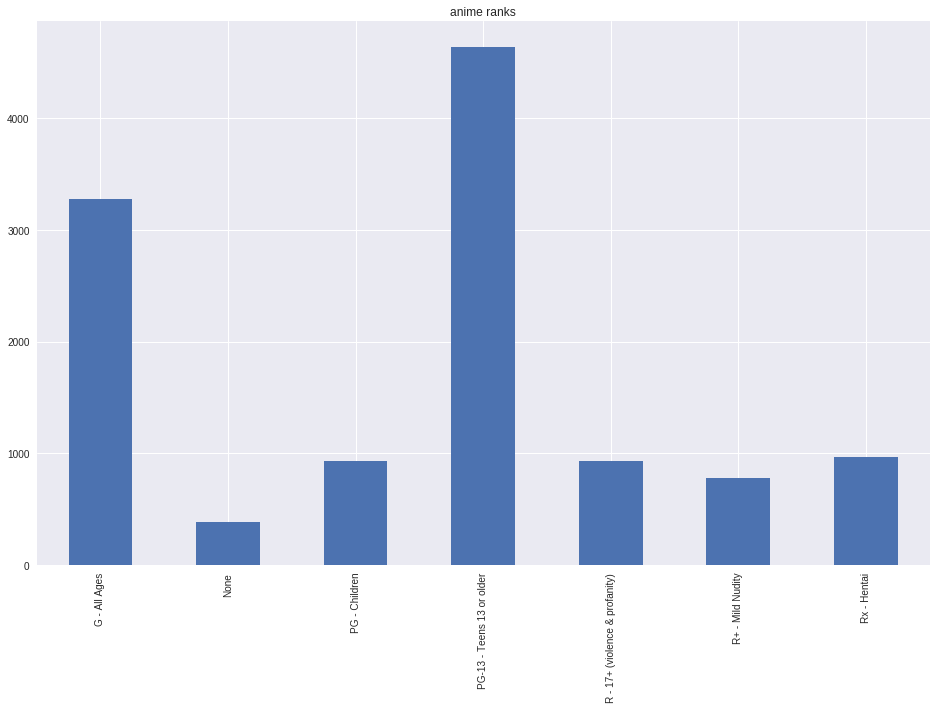

In [61]:
animes['rating'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='anime ranks')

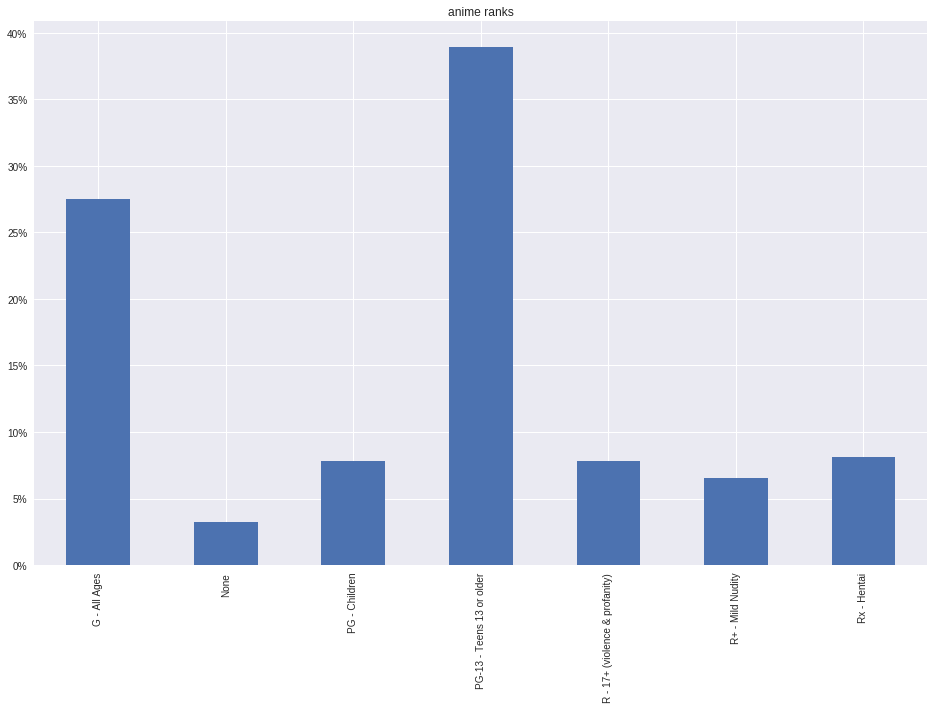

In [62]:
(animes['rating'].value_counts() / animes.shape[0]).sort_index().plot.bar(figsize=(16, 10), title='anime ranks')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

### inspecting anime sources

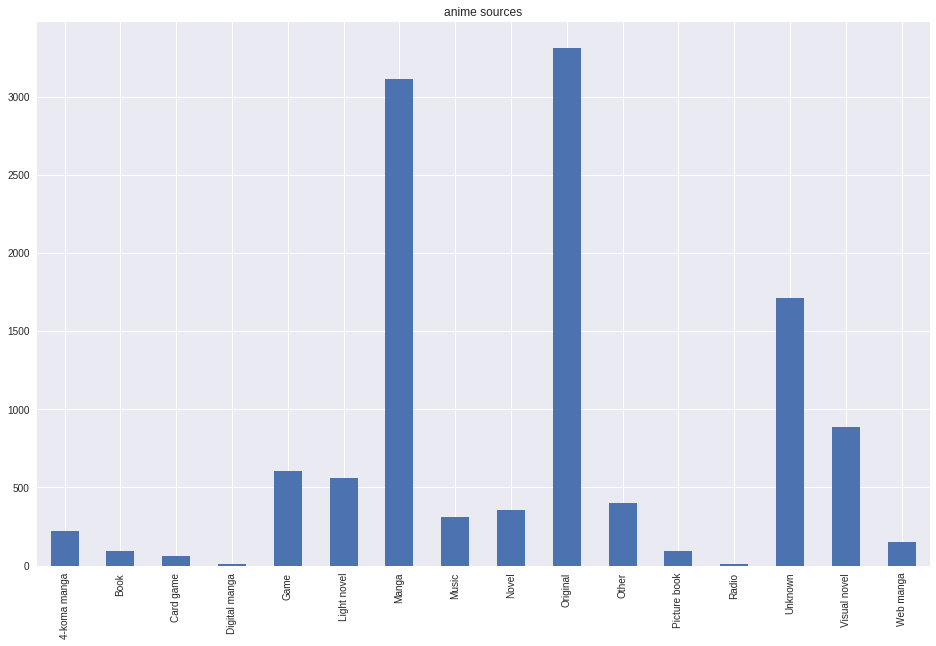

In [63]:
animes['source'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='anime sources')

In [64]:
year_source = pd.crosstab(animes['aired_from'].dt.year, animes['source'])
year_source.index = year_source.index.astype(np.int)
# keeping only interesting sources
year_source = year_source.drop(['Digital manga', 'Music', 'Novel', 'Radio', 'Picture book', 'Book', 'Card game', 'Web manga', 'Unknown', 'Other', '4-koma manga'], axis=1)
colors = plt.cm.Set1(np.linspace(0, 1, year_source.shape[1]))

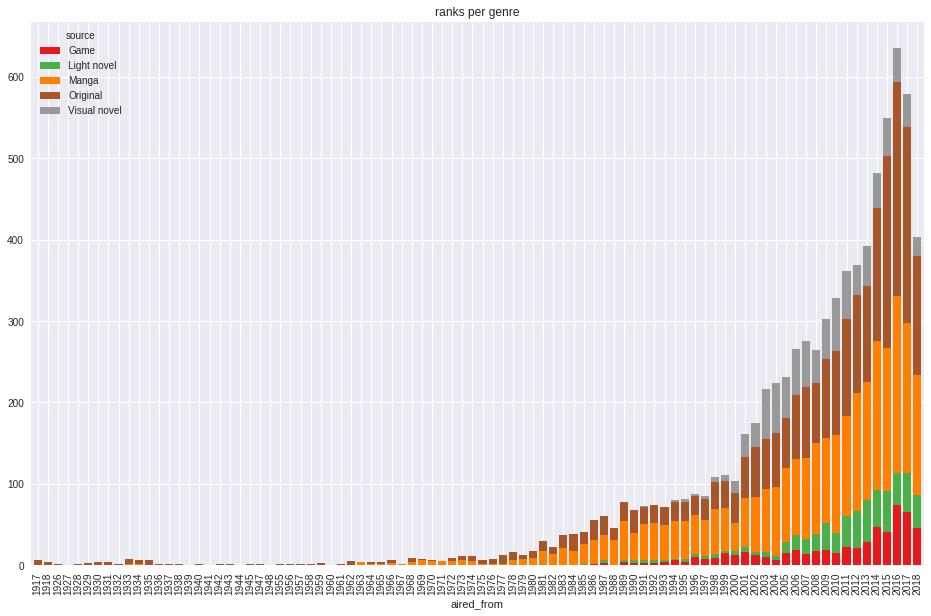

In [65]:
year_source.plot(kind='bar', stacked=True, figsize=(16, 10), title='ranks per genre', color=colors, width=0.8)

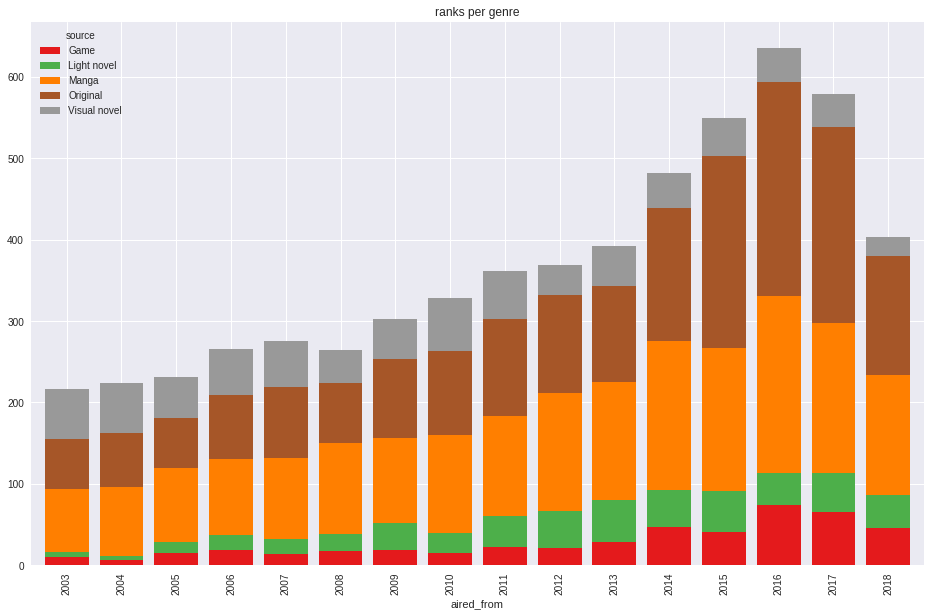

In [66]:
year_source[year_source.index >= 2003].plot(kind='bar', stacked=True, figsize=(16, 10), title='ranks per genre', color=colors, width=0.8)

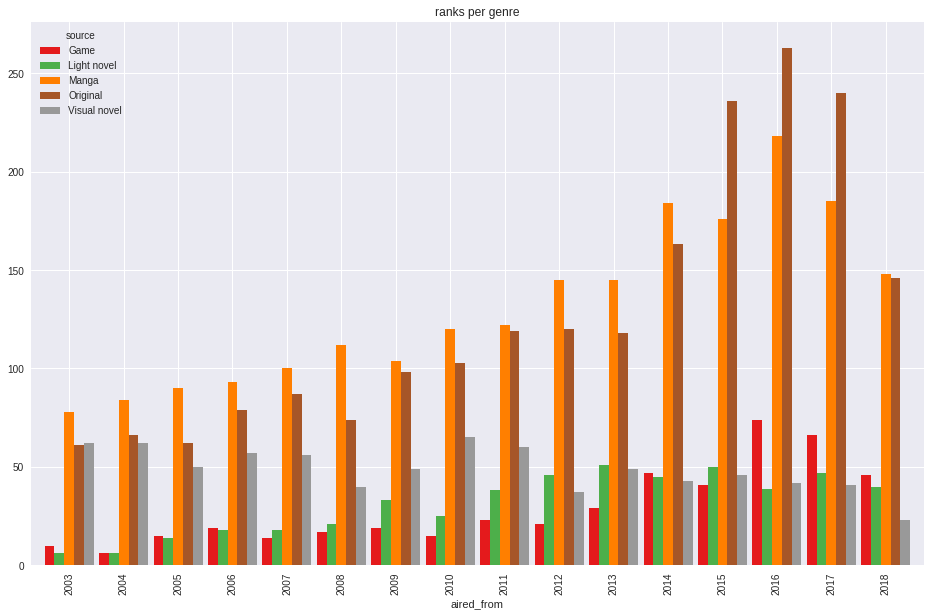

In [67]:
year_source[year_source.index >= 2003].plot(kind='bar', stacked=False, figsize=(16, 10), title='ranks per genre', color=colors, width=0.9)

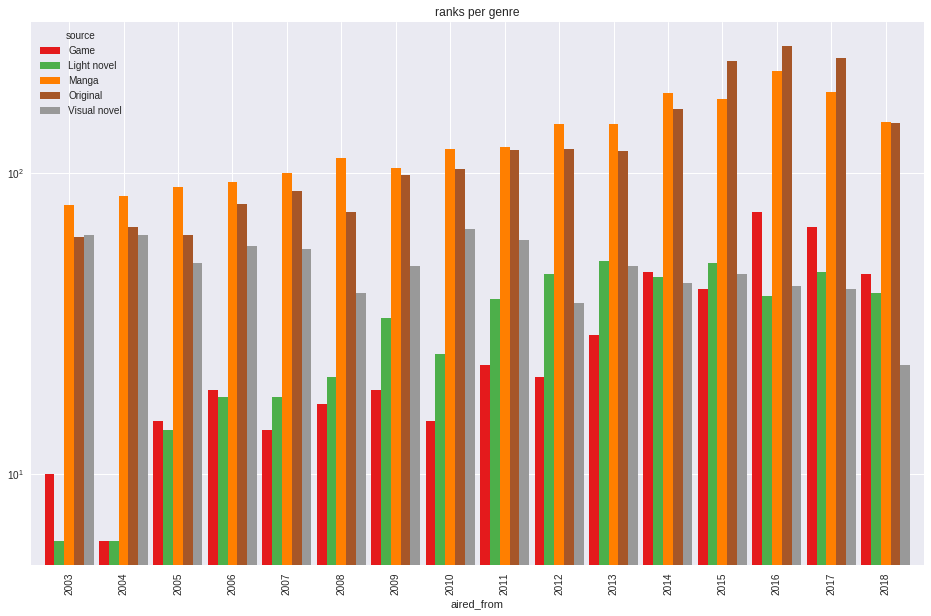

In [68]:
year_source[year_source.index >= 2003].plot(kind='bar', stacked=False, figsize=(16, 10), title='ranks per genre', color=colors, width=0.9, logy=True)

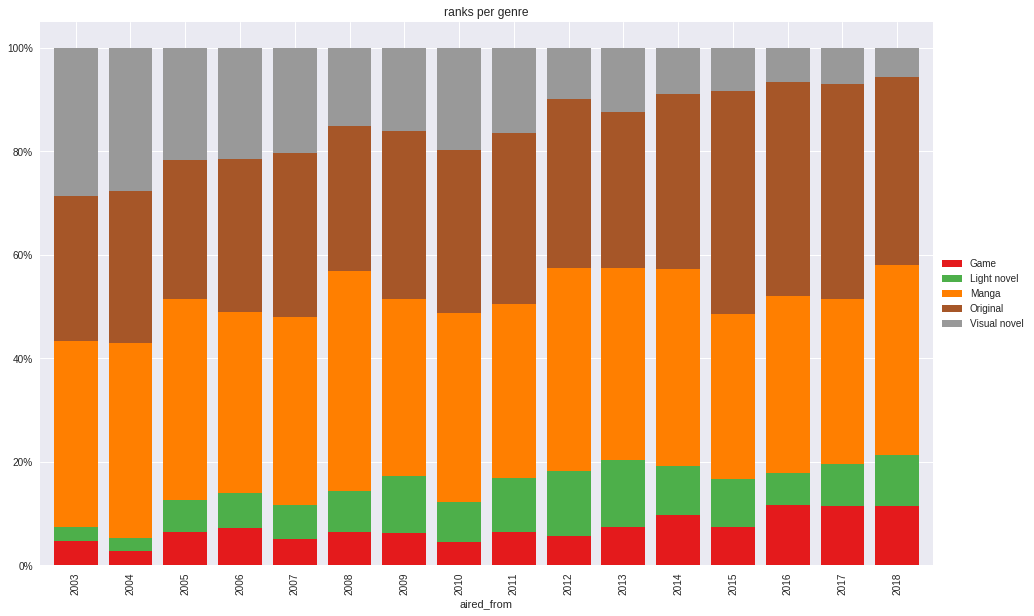

In [69]:
year_source.div(year_source.sum(axis=1), axis=0)[year_source.index >= 2003].plot(kind='bar', stacked=True, figsize=(16, 10), title='ranks per genre', color=colors, width=0.8)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [70]:
animes[animes['source'] == 'Unknown'].sort_values(by='popularity')[['title', 'source', 'studios', 'genres', 'popularity']]

,title,source,studios,genres,popularity
anime_id,,,,,
10805,Kami nomi zo Shiru Sekai: 4-nin to Idol,Unknown,Manglobe,"Comedy, Music, Shounen, Supernatural",1167
6127,Toradora!: SOS!,Unknown,J.C.Staff,Comedy,1231
5764,Zero no Tsukaima: Princesses no Rondo - Yuuwak...,Unknown,J.C.Staff,"Comedy, Ecchi, Fantasy, Harem, Magic",1296
10647,Ao no Exorcist: Ura Ex,Unknown,A-1 Pictures,"Action, Fantasy, Supernatural, Shounen",1429
20939,"Ore no Nounai Sentakushi ga, Gakuen Love Comed...",Unknown,Diomedea,"Comedy, Romance, School",1609
4938,Tsubasa: Shunraiki,Unknown,Production I.G,"Action, Adventure, Mystery, Supernatural, Dram...",1616
6864,xxxHOLiC Rou,Unknown,Production I.G,"Mystery, Supernatural",1674
192,Love Hina Haru Special: Kimi Sakura Chiru Naka...,Unknown,Xebec,"Adventure, Comedy, Romance",1679
9675,Kami nomi zo Shiru Sekai: Flag 0,Unknown,Manglobe,"Comedy, Shounen, Supernatural",1708


In [71]:
animes[(animes['source'] == 'Unknown') & (animes['studios'].isnull())].shape

(0, 32)

In [72]:
# here, in animes_genres, is every anime duplicated, once per each genre it contains
genres_arr = animes['genres'].apply(lambda x: x.replace(' ', '').split(',')).apply(pd.Series).stack().to_frame(name='genre')
genres_arr.index.levels[0].name = 'anime_id'
animes_genres = pd.merge(animes, genres_arr, how='left', left_index=True, right_index=True)

In [75]:
genres_arr

genre
anime_id                
11013    0        Comedy
         1  Supernatural
         2       Romance
         3       Shounen
2104     0        Comedy
         1        Parody
         2       Romance
         3        School
         4       Shounen
5262     0        Comedy
         1         Magic
         2        School
         3        Shoujo
721      0        Comedy
         1         Drama
         2         Magic
         3       Romance
         4       Fantasy
12365    0        Comedy
         1         Drama
         2       Romance
         3       Shounen
6586     0          Kids
         1        School
         2        Shoujo
178      0         Magic
         1        Comedy
         2       Romance
         3        School
         4        Shoujo
...                  ...
30931    2          Kids
35130    0          Kids
         1         Drama
33823    0         Drama
         1    Historical
37535    0   SliceofLife
34237    0        Sci-Fi
30928    0         Drama
         1          Kids
37463    0          Kids
         1         Music
37787    0     Adventure
         1         Space
35229    0          Kids
36640    0          Game
         1         Magic
35085    0         Drama
         1          Kids
35152    0          Kids
27853    0          Kids
         1        School
36315    0          Kids
35040    0          Kids
37897    0        Action
         1        Sci-Fi
         2     Adventure
         3       Fantasy
34193    0       Fantasy
         1          Kids
37908    0        Comedy

[36383 rows x 1 columns]

In [76]:
animes.head()

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,broadcast,related,producer,licensor,studios,genres,opening_theme,ending_theme,duration_min,aired_from
anime_id,,,,,,,,,,,,,,,,,,,,,
11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012-01-13
2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007-04-02
5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008-10-04
721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002-08-16
12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012-10-06


In [77]:
animes_genres.head()

title              title_english title_japanese  \
anime_id                                                                 
11013    0     Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
         1     Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
         2     Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
         3     Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
2104     0  Seto no Hanayome      My Bride is a Mermaid          瀬戸の花嫁   

                  title_synonyms  \
anime_id                           
11013    0       Youko x Boku SS   
         1       Youko x Boku SS   
         2       Youko x Boku SS   
         3       Youko x Boku SS   
2104     0  The Inland Sea Bride   

                                                    image_url type source  \
anime_id                                                                    
11013    0  https://myanimelist.cdn-dena.com/images/anime/...   TV  Manga   
         1  https://myanimelist.cdn-dena.com/images/anime/...   TV  Manga   
         2  https://myanimelist.cdn-dena.com/images/anime/...   TV  Manga   
         3  https://myanimelist.cdn-dena.com/images/anime/...   TV  Manga   
2104     0  https://myanimelist.cdn-dena.com/images/anime/...   TV  Manga   

            episodes           status  airing      ...       \
anime_id                                           ...        
11013    0        12  Finished Airing   False      ...        
         1        12  Finished Airing   False      ...        
         2        12  Finished Airing   False      ...        
         3        12  Finished Airing   False      ...        
2104     0        26  Finished Airing   False      ...        

                                                      related  \
anime_id                                                        
11013    0  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
         1  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
         2  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
         3  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
2104     0  {'Adaptation': [{'mal_id': 759, 'type': 'manga...   

                                                     producer  \
anime_id                                                        
11013    0  Aniplex, Square Enix, Mainichi Broadcasting Sy...   
         1  Aniplex, Square Enix, Mainichi Broadcasting Sy...   
         2  Aniplex, Square Enix, Mainichi Broadcasting Sy...   
         3  Aniplex, Square Enix, Mainichi Broadcasting Sy...   
2104     0                  TV Tokyo, AIC, Square Enix, Sotsu   

                    licensor           studios  \
anime_id                                         
11013    0  Sentai Filmworks  David Production   
         1  Sentai Filmworks  David Production   
         2  Sentai Filmworks  David Production   
         3  Sentai Filmworks  David Production   
2104     0        Funimation             Gonzo   

                                              genres  \
anime_id                                               
11013    0    Comedy, Supernatural, Romance, Shounen   
         1    Comedy, Supernatural, Romance, Shounen   
         2    Comedy, Supernatural, Romance, Shounen   
         3    Comedy, Supernatural, Romance, Shounen   
2104     0  Comedy, Parody, Romance, School, Shounen   

                                 opening_theme  \
anime_id                                         
11013    0               ['"Nirvana" by MUCC']   
         1               ['"Nirvana" by MUCC']   
         2               ['"Nirvana" by MUCC']   
         3               ['"Nirvana" by MUCC']   
2104     0  ['"Romantic summer" by SUN&LUNAR']   

                                                 ending_theme  duration_min  \
anime_id                                                                      
11013    0  ['#1: "Nirvana" by MUCC (eps 1, 11-12)', '#2: ...          24.0   
         1  ['#1: "Nirvan

In [78]:
animes_genres.shape

(36383, 33)

In [79]:
animes_genres = animes_genres[animes_genres['genre'] != '']

In [80]:
rank_count = animes_genres['rating'].unique().size

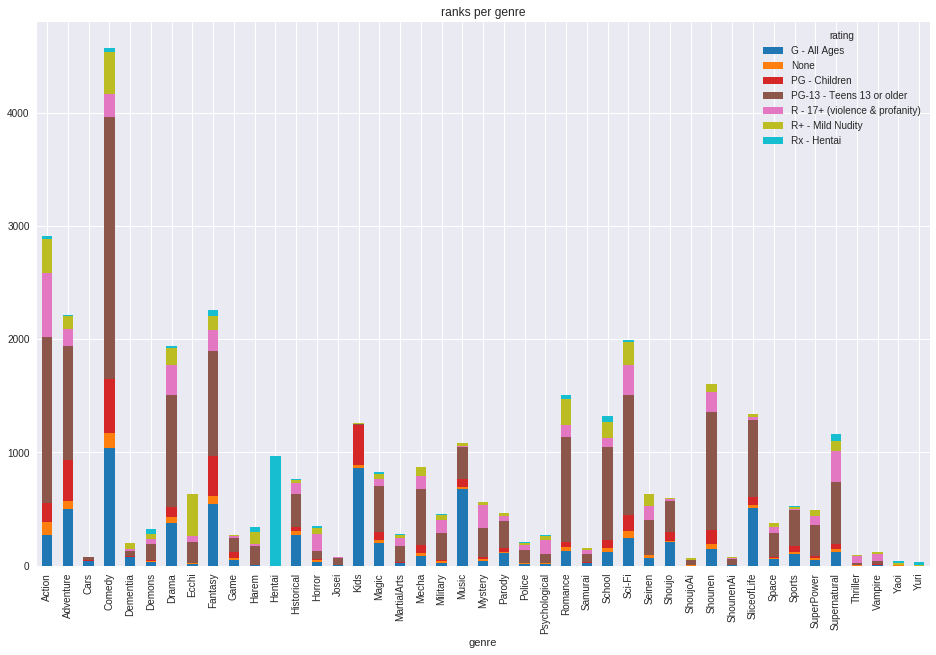

In [81]:
colors = plt.cm.tab10(np.linspace(0, 1, rank_count))
genre_ranks = pd.crosstab(animes_genres['genre'], animes_genres['rating'])
genre_ranks.plot(kind='bar', stacked=True, figsize=(16, 10), title='ranks per genre', color=colors)

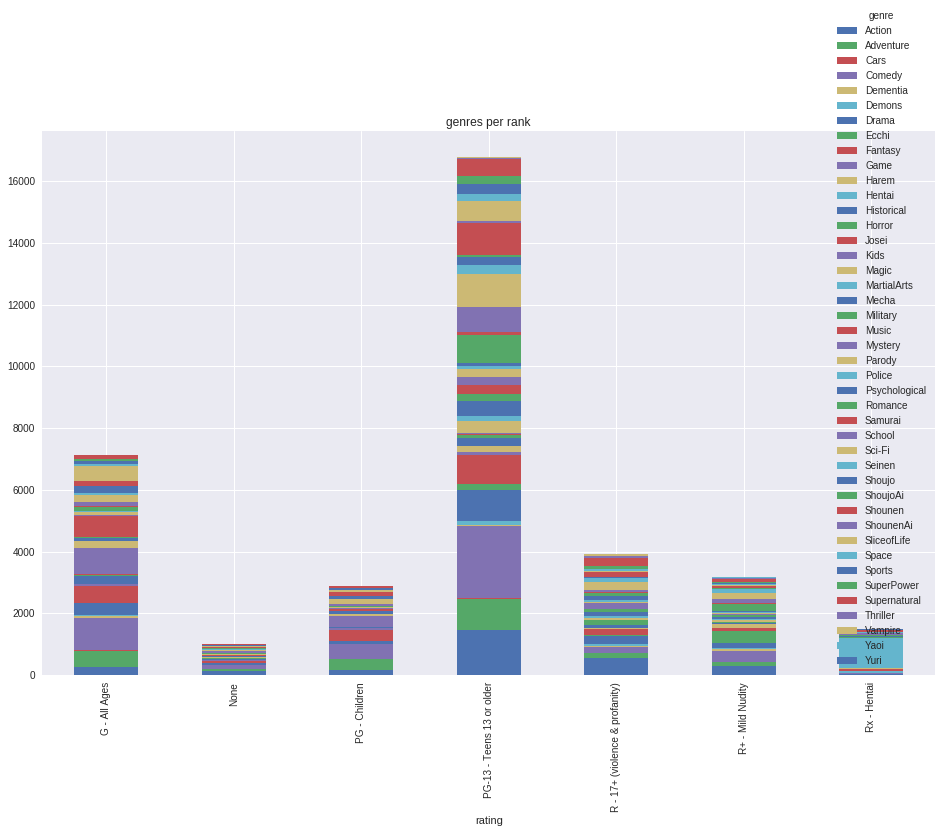

In [82]:
rank_genres = pd.crosstab(animes_genres['rating'], animes_genres['genre'])
rank_genres.plot(kind='bar', stacked=True, figsize=(16, 10), title='genres per rank')

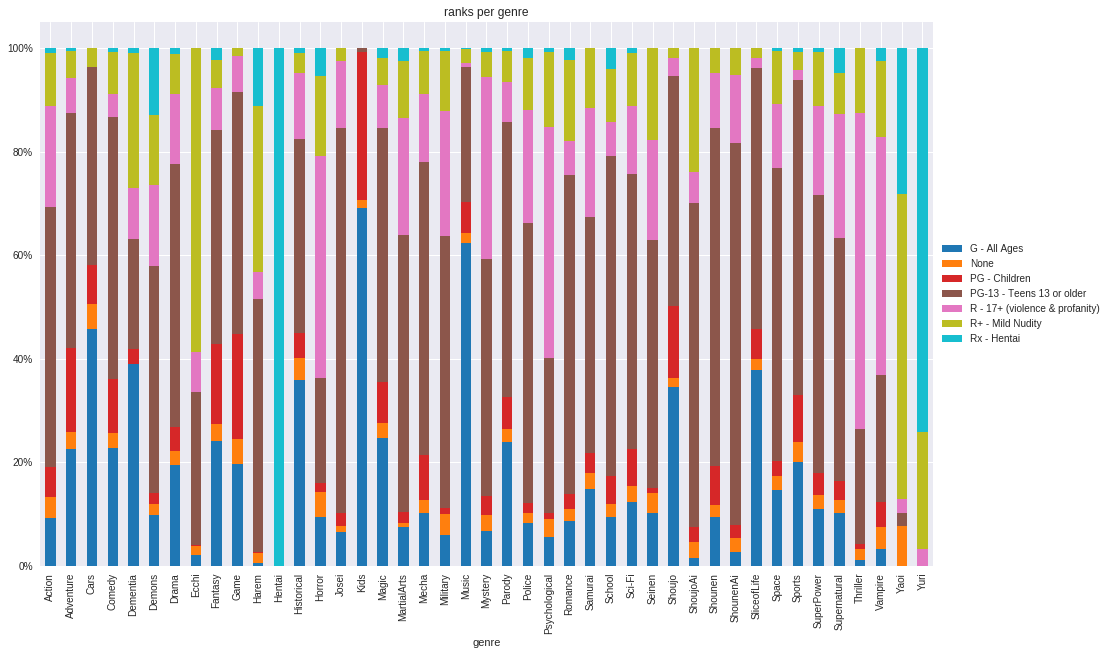

In [83]:
colors = plt.cm.tab10(np.linspace(0, 1, rank_count))
genre_ranks.div(genre_ranks.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(16, 10), title='ranks per genre', color=colors)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

### inspecting studios

In [91]:
print('unique studios combinations:')
animes['studios'].unique().size

unique studios combinations:


777

In [119]:
# now comes some data cleaning, getting rid of commas in studio names for easier manipulation
animes.loc[animes['studios'] == 'Yamamura Animation, Inc.', 'studios'] = 'Yamamura Animation'
# here, in animes_genres, is every anime duplicated, once per each genre it contains
animes['studios'].fillna('', inplace=True)
studios_arr = animes['studios'].apply(lambda x: x.replace(' ', '').split(',')).apply(pd.Series).stack().to_frame(name='studio')
studios_arr.index.levels[0].name = 'anime_id'
animes_studios = pd.merge(animes, studios_arr, how='left', left_index=True, right_index=True)
animes_studios = animes_studios[animes_studios['studio'] != '']

In [120]:
print('unique studios:')
animes_studios['studio'].unique().size

unique studios:


507

In [121]:
animes_studios['studio'].value_counts().sort_values(ascending=False)

ToeiAnimation                  744
Sunrise                        466
Madhouse                       349
J.C.Staff                      333
ProductionI.G                  302
TMSEntertainment               266
StudioDeen                     261
StudioPierrot                  253
NipponAnimation                209
OLM                            199
A-1Pictures                    189
TatsunokoProduction            157
Shin-EiAnimation               157
Xebec                          145
DLE                            144
Gonzo                          123
Shaft                          120
AIC                            118
Bones                          117
KyotoAnimation                 110
Satelight                       88
ProductionReed                  87
Brain&#039;sBase                86
SilverLink.                     83
Gainax                          82
Arms                            73
Studio4°C                       68
Zexcs                           67
DogaKobo            

In [122]:
known_studios = animes_studios['studio'].value_counts().sort_values(ascending=False).index[0:35]
known_studios

Index(['ToeiAnimation', 'Sunrise', 'Madhouse', 'J.C.Staff', 'ProductionI.G',
       'TMSEntertainment', 'StudioDeen', 'StudioPierrot', 'NipponAnimation',
       'OLM', 'A-1Pictures', 'TatsunokoProduction', 'Shin-EiAnimation',
       'Xebec', 'DLE', 'Gonzo', 'Shaft', 'AIC', 'Bones', 'KyotoAnimation',
       'Satelight', 'ProductionReed', 'Brain&#039;sBase', 'SilverLink.',
       'Gainax', 'Arms', 'Studio4°C', 'Zexcs', 'DogaKobo', 'feel.', 'ufotable',
       'StudioGallop', 'Seven', 'StudioGhibli', 'StudioHibari'],
      dtype='object')

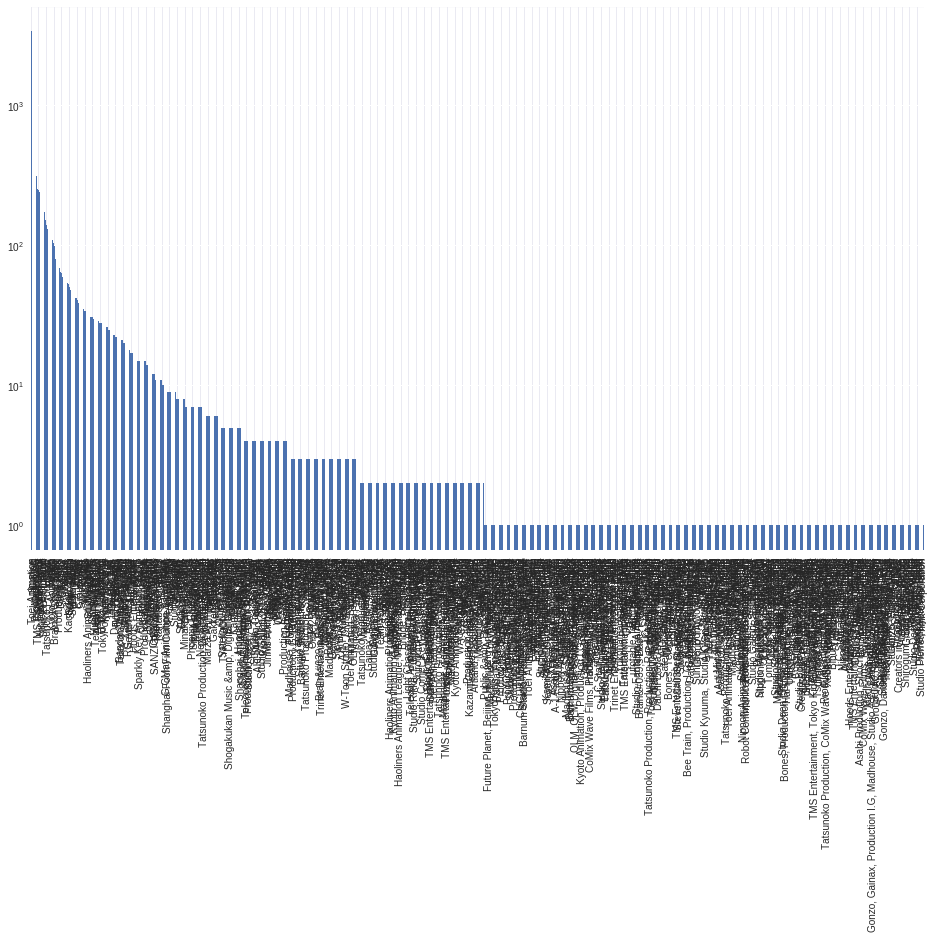

In [123]:
animes['studios'].value_counts().plot(kind='bar', figsize=(16, 10), logy=True)

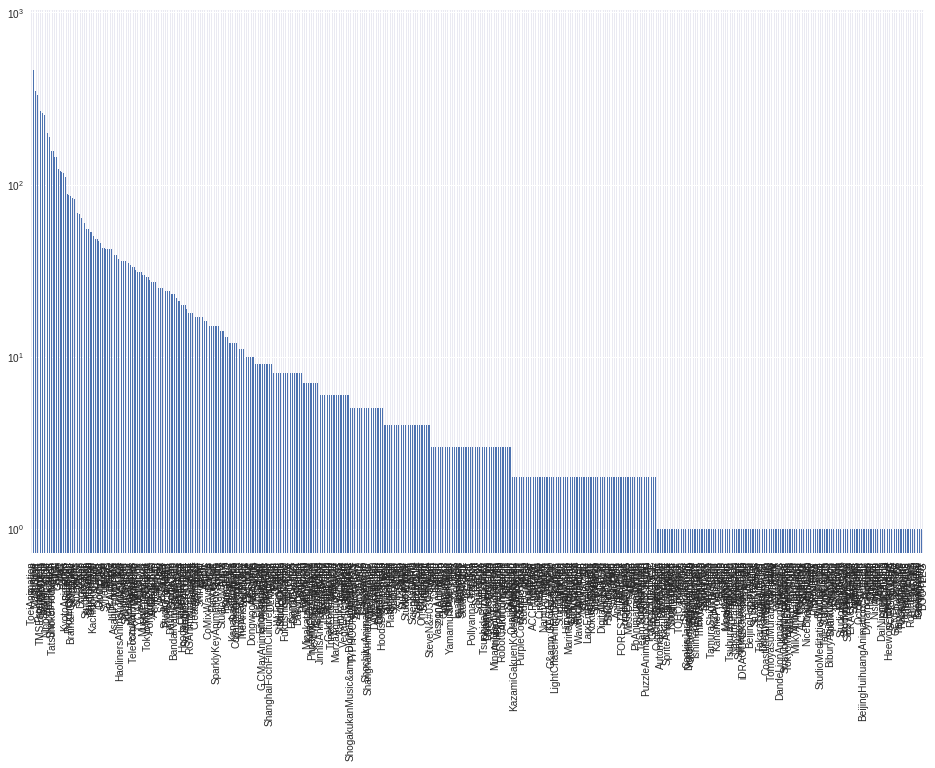

In [125]:
animes_studios['studio'].value_counts().plot(kind='bar', figsize=(16, 10), logy=True)

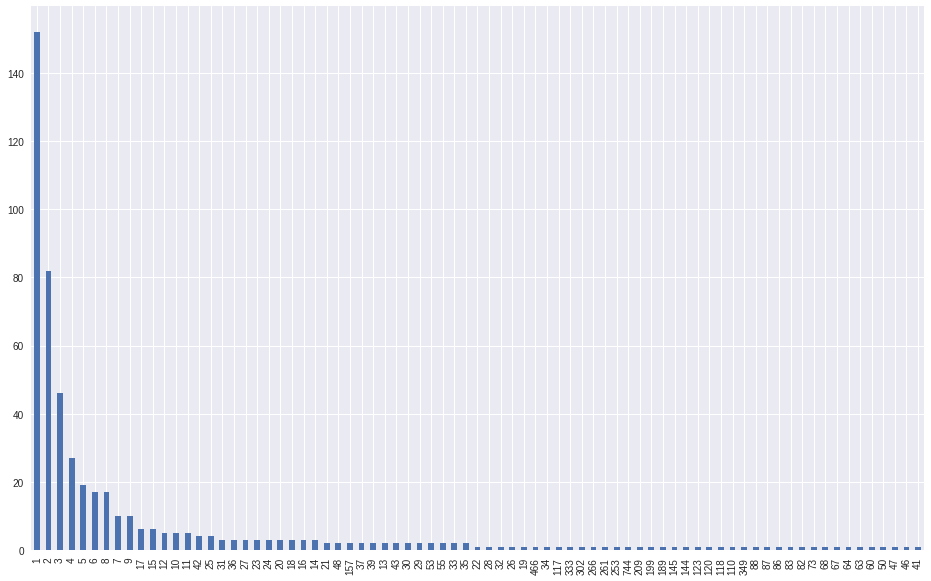

In [126]:
animes_studios['studio'].value_counts().value_counts().plot(kind='bar', figsize=(16, 10))

In [134]:
studio_counts = animes_studios['studio'].value_counts().sort_values(ascending=False)
# bigger studios are with 10 or more anime
bigger_studios = studio_counts[studio_counts >= 10].index
print('# studios with 10 or more anime')
len(bigger_studios)

# studios with 10 or more anime


127

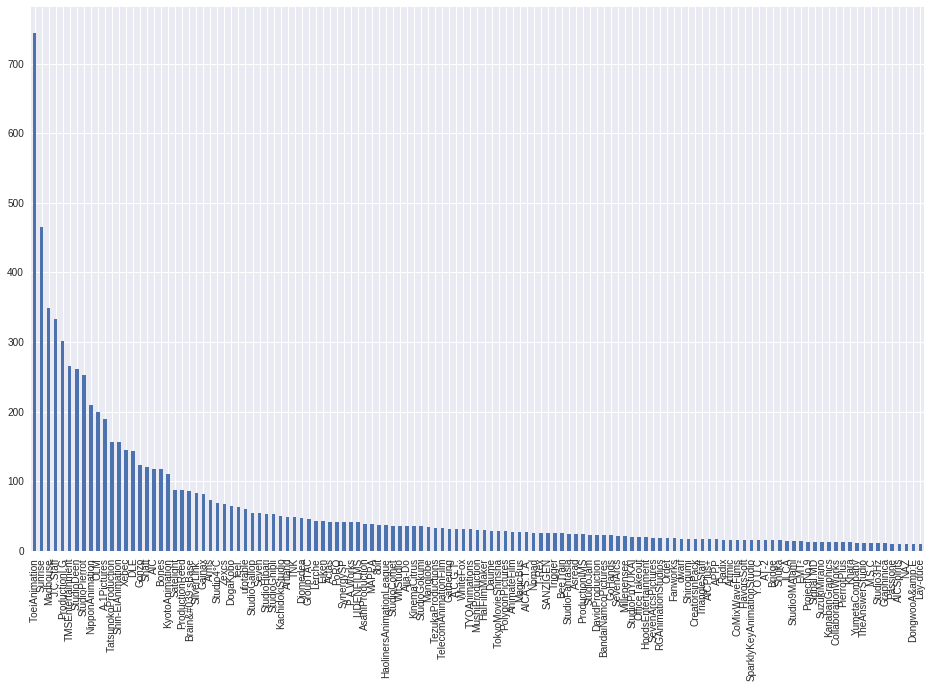

In [128]:
animes_studios[animes_studios['studio'].isin(bigger_studios)]['studio'].value_counts().plot(kind='bar', figsize=(16, 10))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

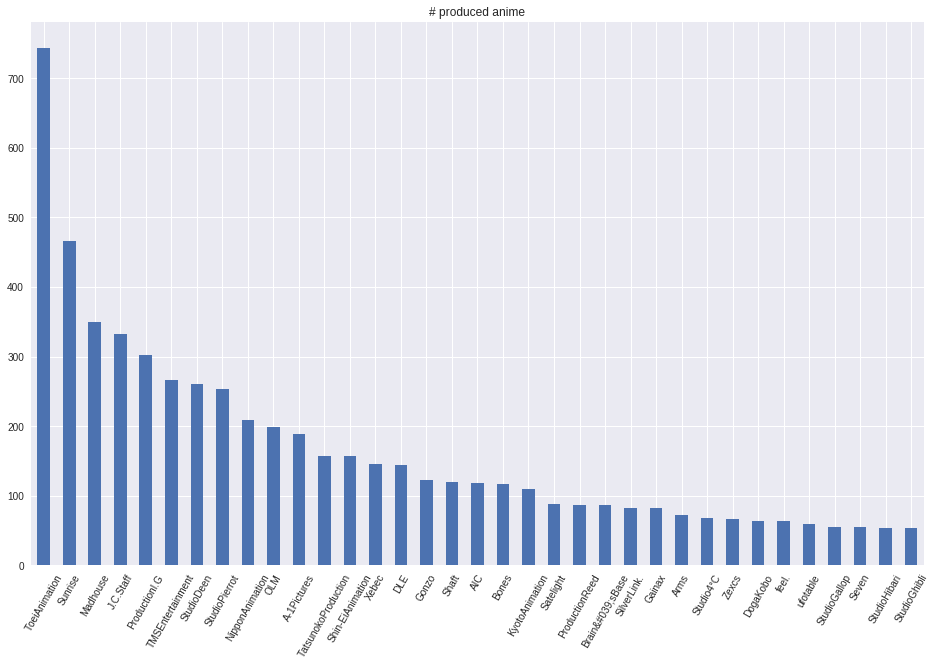

In [139]:
animes_studios[animes_studios['studio'].isin(known_studios)]['studio'].value_counts().plot(kind='bar', figsize=(16, 10), title='# produced anime')
plt.xticks(rotation=60)

In [214]:
animes_studios_genres = pd.merge(animes_studios, genres_arr, how='left', left_index=True, right_index=True)
animes_studios_genres = animes_studios_genres[animes_studios_genres['genre'] != '']

In [215]:
studios_genres = pd.crosstab(animes_studios_genres['studio'], animes_studios_genres['genre'])
# only for known studios
studios_genres = studios_genres[studios_genres.index.isin(known_studios)]

In [216]:
studios_genres.columns

Index(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'MartialArts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'ShounenAi',
       'SliceofLife', 'Space', 'Sports', 'SuperPower', 'Supernatural',
       'Thriller', 'Vampire', 'Yaoi'],
      dtype='object', name='genre')

In [217]:
interesting_genres = ['Action', 'Adventure', 'Comedy', 'Drama',
       'Fantasy', 'Hentai', 
       'Kids', 'Magic', 'Mecha', 'Music',
       'Mystery', 'Romance', 
       'Sci-Fi', 'SliceofLife']

In [218]:
# group rest of genres to "other" value
other_genres = list(set(studios_genres.columns) - set(interesting_genres))
studios_genres['other'] = studios_genres[other_genres].sum(axis=1)
studios_genres.drop(other_genres, inplace=True, axis=1)
studios_genres

genre,Action,Adventure,Comedy,Drama,Fantasy,Hentai,Kids,Magic,Mecha,Music,Mystery,Romance,Sci-Fi,SliceofLife,other
studio,,,,,,,,,,,,,,,
A-1Pictures,68,10,48,6,5,0,1,2,0,13,3,0,10,14,9
AIC,48,13,19,3,2,1,0,2,0,0,0,6,9,6,9
Arms,31,4,11,3,1,15,1,0,0,0,0,0,0,0,7
Bones,69,7,6,6,3,0,0,0,0,4,4,0,8,2,8
Brain&#039;sBase,19,7,17,6,3,0,0,0,3,2,2,0,1,12,14
DLE,6,1,96,1,3,0,0,0,0,4,1,0,1,8,22
DogaKobo,11,1,27,2,0,0,0,0,0,0,2,1,1,11,8
Gainax,30,5,19,1,0,0,0,4,2,2,0,0,5,1,13
Gonzo,63,12,18,7,3,0,0,0,2,1,2,0,6,3,6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

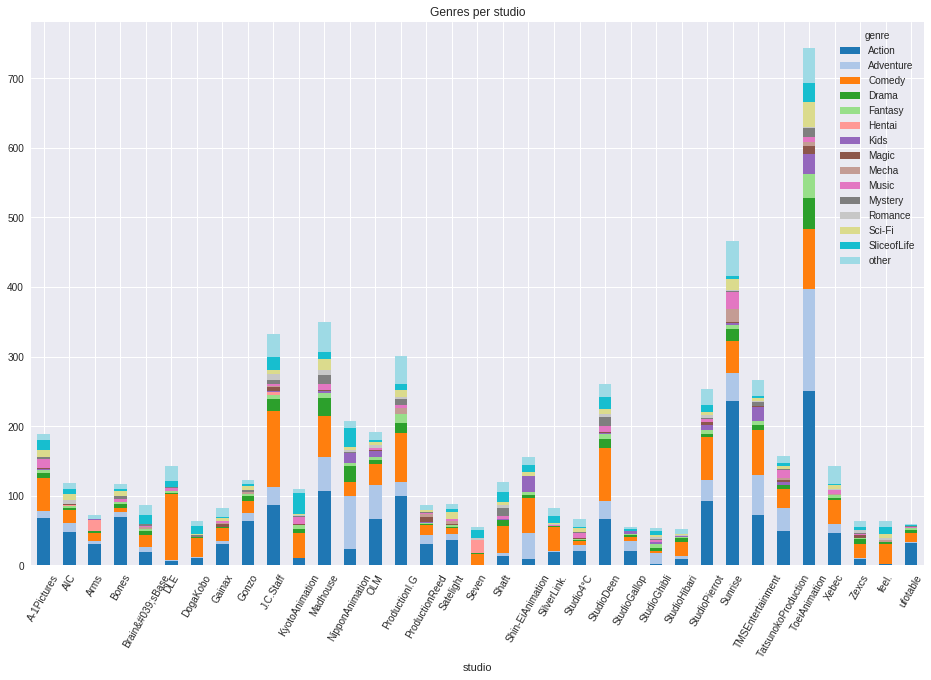

In [219]:
colors = plt.cm.tab20(np.linspace(0, 1, studios_genres.shape[1]))
studios_genres.plot.bar(stacked=True, figsize=(16, 10), title='Genres per studio', color=colors)
plt.xticks(rotation=60)

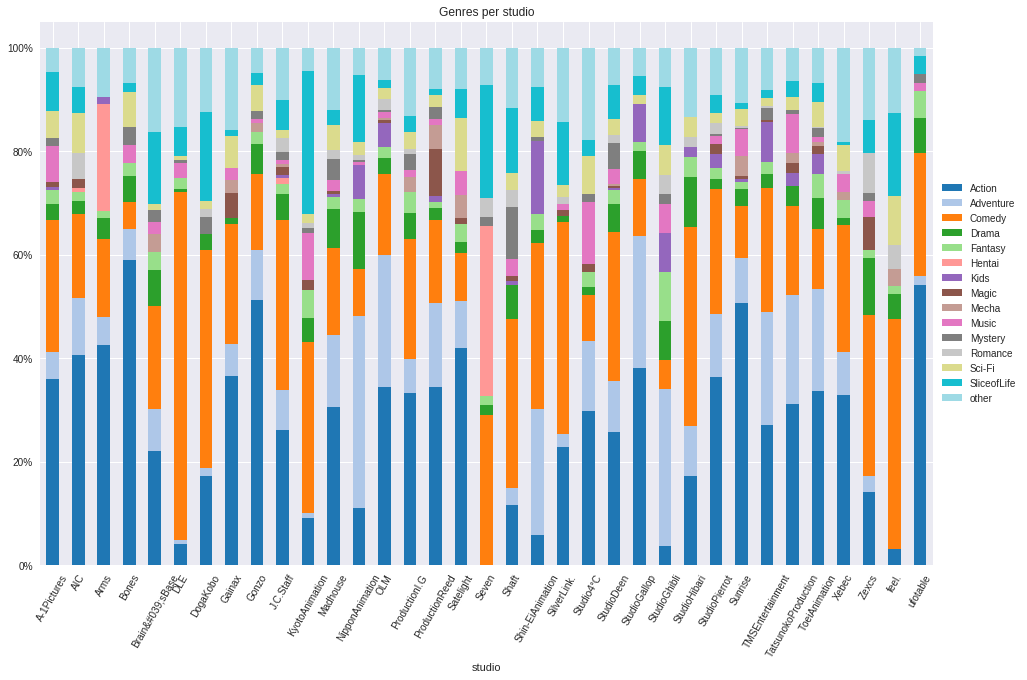

In [220]:
studios_genres.div(studios_genres.sum(axis=1), axis=0).plot.bar(stacked=True, figsize=(16, 10), title='Genres per studio', color=colors)
plt.xticks(rotation=60)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [240]:
studios_genres.sum(axis=0)

251

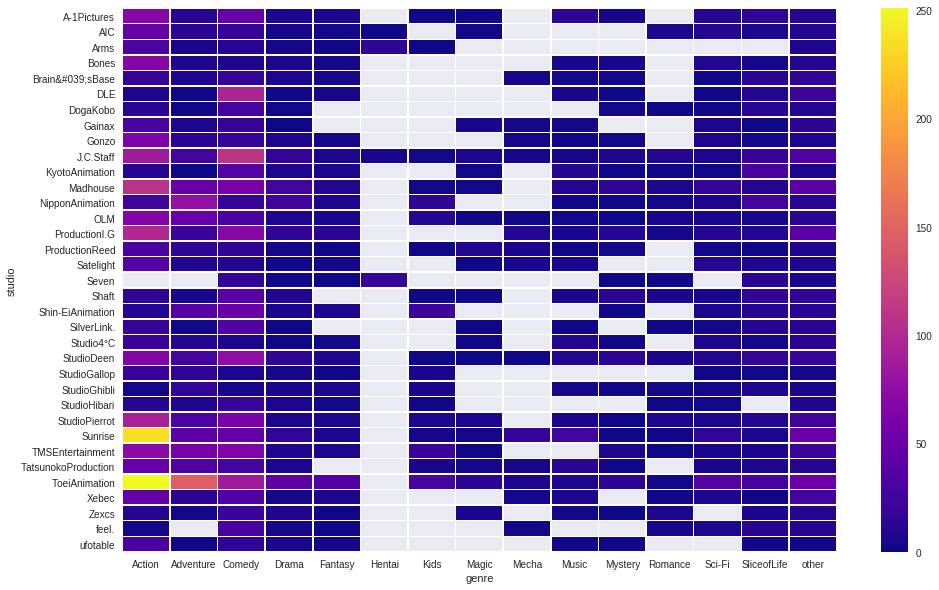

In [255]:
# showing pairwise heatmap from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
colors = plt.cm.plasma(np.linspace(0, 1, studios_genres.max().max()))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 0, sep=20, as_cmap=True)

mask = np.zeros_like(studios_genres, dtype=np.bool)
mask[studios_genres == 0] = True

sns.heatmap(studios_genres, mask=mask, linewidths=.5, cmap=plt.cm.plasma)


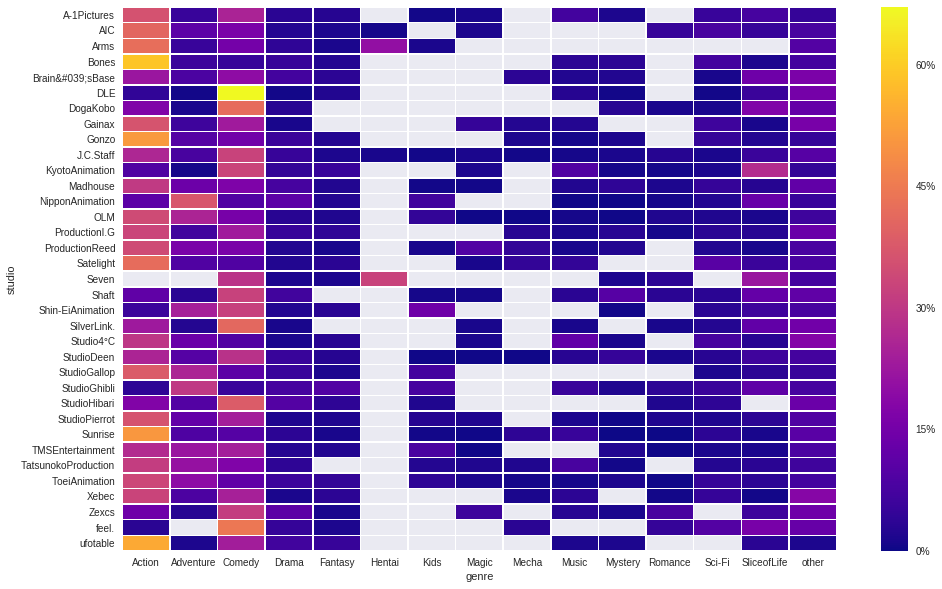

In [269]:
f, ax = plt.subplots(figsize=(16, 10))
mask = np.zeros_like(studios_genres, dtype=np.bool)
mask[studios_genres == 0] = True
sns.heatmap(studios_genres.div(studios_genres.sum(axis=1), axis=0) * 100, mask=mask, linewidths=.5, cmap=plt.cm.plasma, cbar_kws={'format': '%.0f%%'})


### calculating embeddings to show topology